# <center> **ĐỒ ÁN CUỐI KỲ - LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU**


## Thông tin nhóm
| MSSV | Họ và tên              |
|-----------|------------------------|
| 22127180  | Nguyễn Phúc Khang      |
| 22127346  | Nguyễn Trung Quân      |
| 22127451  | Phan Thị Tường Vi      |


## **Table of contents**

1. [Thu thập dữ liệu (Collecting data)](#collect)

    a. [Chủ đề](#about)
   
    b. [Giấy phép và bản quyền](#license)
   
    c. [Phương pháp thu thập dữ liệu](#howtocollect)

2. [Khám phá dữ liệu (Exploring data)](#eda)

    a. [Tiền xử lý dữ liệu file `understat.com.csv`](#preprocess1)
   
    a.1. [Làm sạch dữ liệu](#clean1)

    a.2. [Xử lý dữ liệu bị thiếu](#missing1)
   
    a.3. [Xử lý dữ liệu bị nhiễu bằng dùng IQR](#iqr1)

    a.4. [Giảm chiều dữ liệu](#reduce_dim1)

    a.5. [Chuẩn hóa dữ liệu](#normalization1)

    a.6. [Lưu dữ liệu](#save1)

    b. [Tiền xử lý dữ liệu file `understat_per_game.csv`](#preprocess2)
   
    b.1. [Làm sạch dữ liệu](#clean2)
   
    a.2. [Xử lý dữ liệu bị thiếu](#missing2)

    b.3. [Xử lý dữ liệu bị nhiễu bằng dùng IQR](#iqr2)

    b.4. [Giảm chiều dữ liệu](#reduce_dim2)

    b.5. [Chuẩn hóa dữ liệu](#normalization2)

    b.6. [Lưu dữ liệu](#save2)

    c. [Tổng hợp dữ liệu đã xử lý](#summary)

3. [Trả lời câu hỏi (Answer meaningful questions)](#questions)

  [Câu 1: Tỷ lệ thắng của các trận đấu khi diễn ra trên sân nhà và trên sân khách qua từng mùa giải (năm) như thế nào? Điều này có chứng minh được lợi thế sân nhà không?](#q1)

  [Câu 2: Liệu một đội có số trận thắng cao, số trận thua ít thì có xếp hạng cao hơn không? Thống kê trung bình thắng-hòa-thua giữa các thứ hạng.](#q2)

  [Câu 3: Đội bóng nào có hiệu suất tốt nhất trong mỗi giải đấu?](#q3)

  [Câu 4: Các chỉ số như `deep` và `deep_allowed` có mối quan hệ thế nào với thứ hạng cuối cùng?](#q4)

  [Câu 5: Mối quan hệ giữa số điểm thực tế (pts) và số điểm kỳ vọng (xpts) là gì? Top 5 đội bóng của năm gần đây nhất của mỗi giải đấu được kỳ vọng và họ thể hiện thế nào? Sự kỳ vọng (xpts) có ảnh hưởng đến thứ hạng cuối không?](#q5)

  [Câu 6: Số lượng performance được phân bố như thế nào?](#q6)

  [Câu 7: Những chỉ số `xG`, `xGA`, `npxG`, `npxGA` và `xpts` có tương quan thế nào với kết quả trận đấu (thắng, hòa, thua)?](#q7)

  [Câu 8: Có sự khác biệt đáng kể nào về hiệu suất (xG, xGA, pts) giữa các trận sân nhà và sân khách không?](#q8)

  [Câu 9: Các chỉ số `PPDA` có tương quan như thế nào với kết quả trận đấu?](#q9)

  [Câu 10: Điểm số của các đội bóng thay đổi như thế nào qua các mùa giải, từ đó thấy được sự cạnh tranh giữa các mùa giải ra sao?](#q10)

  [Câu 11: Dựa trên điểm số đội bóng qua các mùa giải, điểm của các đội trong các giải đấu vào những năm tiếp theo là như thế nào?](#q11)

  [Câu 12: Các đội bóng có số trận thắng cao có đặc điểm gì về số bàn thắng ghi được và số bàn thua?](#q12)

4. [Tự đánh giá](#reflection)

5. [Tham khảo](#ref)


## **1. Thu thập dữ liệu (Collecting data)** <a name="collect"></a>

### **a. Chủ đề** <a name="about"></a>

Bộ dữ liệu được tham khảo từ trang [Football Data: Expected Goals and Other Metrics - Kaggle](https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg). Dữ liệu cho phép phân tích chuyên sâu về từng trận đấu trong các giải đấu hàng đầu Châu Âu, từ các thông số, ta có thể khai thác được những yếu tố ít được quan tâm nhưng làm nên sự thành công của đội bóng và từ đó kết luận được chiến thuật và chiến lược đội bóng áp dụng cho mùa giải.

Bộ dữ liệu bao gồm các thông số tổng hợp sau một mùa giải của các đội bóng thuộc 6 giải đấu thuộc UEFA từ năm 2014 đến năm 2019 bao gồm: La Liga (Tây Ban Nha), EPL (Anh), Bundesliga (Đức), Serie A (Ý), Ligue 1 (Pháp), RFPL (Nga)

Bộ dữ liệu sẽ gồm các thông số cơ bản như: thứ hạng (position), team (tên đội), số trận đã chơi trong giải đấu (matches), số trận thắng - hòa - thua (wins, draws, loses), số bàn ghi được (GF), số bàn thủng lưới (GA), số điểm (points). Ngoài ra, bộ dữ liệu còn các thông số khác như:

- xG - bàn thắng kỳ vọng, thông số thể hiện chất lượng của cú dứt điểm được tạo ra bởi cầu thủ. Trong bộ dữ liệu này, bàn thắng kỳ vọng thể hiện số chất lượng các cú dứt điểm đến từ đội bóng.

- xG_diff - sai số bàn thắng kỳ vọng, thông số thể hiện số lượng bàn thắng thực tế so với bàn thắng kỳ vọng được tạo bởi đội bóng.

- npxG - bàn thắng kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- xGA - số bàn thua kỳ vọng nhận được, thông số thể hiện chất lượng các cú dứt điểm được tạo ra bởi đối thủ khi đối đầu với đội bóng.

- xGA_diff - sai số bàn thua kỳ vọng nhận được, thông số thể hiện số lượng bàn thua thực tế so với số bàn thua kỳ vọng nhận được.

- npxGA - số bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- npxGD - sai số giữa bàn thắng và bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- ppda_coef - số đường chuyền thành công trên hành động phòng thủ trên phần sân đối phương, thông số thể hiện khả năng kiểm soát bóng của đội trên phần sân đối phương. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đối phương lên đội trên phần sân của đối phương.

- oppda_coef - số đường chuyền thành công trên hành động phòng thủ trên phần sân nhà, thông số thể hiện khả năng kiểm soát bóng của đối phương trên phần sân của đội. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đội lên đối phương trên phần sân nhà của đội.

- deep - số đường chuyền thành công (không bao gồm tạt bóng) của đội trong khu vực 18,3m so với khung thành của đối phương (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142))

- deep_allowed - số đường chuyền thành công (không bao gồm tạt bóng) của đối phương trong khu vực 18,3m so với khung thành của đội (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142))

- xpts - số điểm kỳ vọng của đội

- xpts_diff - sai số giữa số điểm thực tế và số điểm kỳ vọng của đội

### **b. Giấy phép và bản quyền** <a name="license"></a>

- **Tác giả:** [Sergi Lehkyi](https://www.kaggle.com/slehkyi)
- **Nguồn:** Dữ liệu được lấy từ trang [understat](https://understat.com) - Trang chuyên cung cấp các thông số chuyên sâu về trận đấu và cầu thủ bóng đá miễn phí.

- **Giấy phép:** Tác giả đề cập quyền sử dụng trong phạm vi "Data files © Original Authors", tuy không phải giấy phép chính thức nhưng phản ánh bộ dữ liệu thuộc quyền sở hữu bản quyền của tác giả gốc đã tạo ra hoặc thu thập. Nhóm sử dụng bộ dữ liệu không được tự ý sao chép, chia sẻ hoặc sử dụng dữ liệu cho mục đích thương mại mà không có sự cho phép từ tác giả gốc mà chỉ sử dụng trong trườg hợp nghiên cứu và giáo dục.

### **c. Phương pháp thu thập dữ liệu** <a name="howtocollect"></a>

**Phương pháp thu thập dữ liệu:** Thu thập dữ liệu từng trận đấu bằng việc crawl thông tin từ trang web (BeautifulSoup) thành 2 file csv và tổng hợp kết quả vào một file dữ liệu thống nhất. Bộ dữ liệu trong thư mục `data` là những dữ liệu đã qua xử lý nhằm phù hợp với mục đích nghiên cứu của đồ án. Bộ dữ liệu trong thư mục `raw data` là bộ dữ liệu gốc của tác giả. Trong đó, có 2 tập tin dữ liệu csv có ý nghĩa như sau:

- `understat.com.csv`: gồm các thông tin tổng quát của các đội ở các mùa giải trong từng hệ thống giải đấu.
- `understat_per_game.csv`: gồm các thông tin và thông số chuyên sâu về từng trận đấu của đội đó ở các mùa giải trong từng hệ thống giải đấu.


**Thông tin các bộ dữ liệu**: Nhóm thực hiện phân tích trên 2 bộ dữ liệu `understat.com.csv` (tổng quan) và bộ dữ liệu `understat_per_game.csv` (chi tiết từng trận đấu), tạm gọi hai bộ dữ liệu này là `overview` và `details`, các bộ chi tiết bao gồm:

- `overview`: 684 dòng và 24 cột
- `details`: 24580 dòng và 29 cột
- Cả hai bộ dữ liệu đều không có dòng bị trùng lặp
- Sau khi thực hiện quá trình tiền xử lý, ta sẽ được 2 file tiền xử lý là `understat.com_preprocess.csv` và `understat_per_game_preprocess.csv`

In [1]:
import pandas as pd

* Dữ liệu tổng quát về thông số thi đấu của đội bóng trong mùa giải thuộc một giải đấu (24 cột và 14 cột thông số chuyên sâu)

In [2]:
raw_data_overview = pd.read_csv('data/understat.com.csv')
raw_data_overview

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838079   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

* Dữ liệu tổng quát về thông số thi đấu trong từng trận đấu của đội bóng trong mùa giải thuộc một giải đấu (29 cột và 26 cột thông số chuyên sâu)

In [3]:
raw_data_details = pd.read_csv('data/understat_per_game.csv')
raw_data_details

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
0                 4       2  ...   9.625000       231       24  21.850000   
1                 1       1  ...   4.756098       195       41  17.695652   
2                 3       2  ...   5.060606       167       33  16.961538   
3                 2       0  ...   4.423077       115       26   9.446809   
4                 2       4  ...   4.250000       170       40  44.800000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
0            437         20  Bayern Munich  0.570120  0.198420    -0.6514  
1            407         23  Bayern Munich  0.503280  0.307950     0.5143  
2            441         26  Bayern Munich -0.770130  0.310166    -0.8412  
3            444         47  Bayern Munich  1.035190  0.203118     1.1367  
4            448         10  Bayern Munich -0.517140  0.402844    -0.0713  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[24580 rows x 29 columns]

## **2. Khám phá dữ liệu (Exploring data)** <a name="eda"></a>

### Import các thư viện cần thiết


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **a. Tiền xử lý dữ liệu từ file `understat.com.csv`** <a name="preprocess1"></a>

Đây là dữ liệu tổng hợp các chỉ số thống kê của các đội bóng qua từng mùa giải trong một giải đấu cụ thể. Nó bao gồm các thông tin về hiệu suất của đội bóng như số trận đấu, số bàn thắng, bàn thua, điểm số thực tế, và các chỉ số kỳ vọng như xG (Expected Goals) hoặc xGA (Expected Goals Against).

Phạm vi dữ liệu: tổng hợp cả mùa giải

Thời gian mùa giải: 2014 - 2019

Số lượng mùa giải: 6 mùa


#### **a.1. Làm sạch dữ liệu** <a name="clean1"></a>

Đầu tiên, ta sẽ quan sát file `understat.com.csv` để có cái nhìn tổng quát nhất

In [5]:
raw_data_overview

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838079   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

##### Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


Tiếp theo, chúng ta tính toán số lượng dòng và cột và lưu vào biến `num_cols_overview` và `num_rows_overview`

In [6]:
num_rows_overview, num_cols_overview =raw_data_overview.shape
print(f'Số dòng: {num_rows_overview}')
print(f'Số cột: {num_cols_overview}')

Số dòng: 684
Số cột: 24


##### Ý nghĩa của các dòng dữ liệu




Mỗi dòng đại diện cho một đội bóng trong một mùa giải cụ thể của một giải đấu. Dữ liệu dòng bao gồm các thông tin về năm, tên đội, xếp hạng, số trận đã đấu, số trận thắng, hòa, thua, tổng số bàn thắng ghi được và số bàn thua phải nhận,...

##### Dữ liệu các dòng có bị lặp không?

Tiếp theo, tính toán số lượng dòng có lặp không và lưu vào biến `duplicated_rows_overview`

In [7]:
duplicated_rows_overview = raw_data_overview[raw_data_overview.duplicated()]
if duplicated_rows_overview.empty:
    print("Không có dòng bị lặp trong dữ liệu.")
else:
    print("Có dòng bị lặp trong dữ liệu.")

Không có dòng bị lặp trong dữ liệu.


Như vậy, giữa mỗi dòng không có dự liệu nào bị lặp

##### Các cột dữ liệu



In [8]:
print(pd.Series(raw_data_overview.columns).to_string())

0           league
1             year
2         position
3             team
4          matches
5             wins
6            draws
7            loses
8           scored
9           missed
10             pts
11              xG
12         xG_diff
13            npxG
14             xGA
15        xGA_diff
16           npxGA
17           npxGD
18       ppda_coef
19      oppda_coef
20            deep
21    deep_allowed
22            xpts
23       xpts_diff


##### Ý nghĩa của các cột dữ liệu

- league: Tên giải đấu (ví dụ: La Liga, Bundesliga).

- year: Năm diễn ra mùa giải.

- position: Vị trí xếp hạng cuối cùng của đội trong mùa giải.

- team: Tên đội bóng.

- matches: Số trận đấu đã chơi.

- wins: Số trận thắng.

- draws: Số trận hòa.

- loses: Số trận thua.

- scored: Tổng số bàn thắng ghi được.

- missed: Tổng số bàn thua.

- pts: Tổng điểm (thắng 3 điểm, hòa 1 điểm, thua 0 điểm).

- xG: Tổng bàn thắng kỳ vọng (Expected Gooals), thông số thể hiện chất lượng của cú dứt điểm được tạo ra bởi cầu thủ. Trong bộ dữ liệu này, bàn thắng kỳ vọng thể hiện số chất lượng các cú dứt điểm đến từ đội bóng.

- xG_diff: Sai số bàn thắng kỳ vọng, thông số thể hiện số lượng bàn thắng thực tế so với bàn thắng kỳ vọng được tạo bởi đội bóng.

- xGA: Tổng số bàn thua kỳ vọng (Expected Goals Against), thông số thể hiện chất lượng các cú dứt điểm được tạo ra bởi đối thủ khi đối đầu với đội bóng.

- xGA_diff: Sai số bàn thua kỳ vọng nhận được, thông số thể hiện số lượng bàn thua thực tế so với số bàn thua kỳ vọng nhận được.

- npxG: Tổng bàn thắng kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- npxGA: Tổng số bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- npxGD: sai số giữa bàn thắng và bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal)-(npxG - npxGA).

- ppda_coef: Chỉ số PPDA (Passes Allowed Per Defensive Action) - số đường chuyền thành công trên hành động phòng thủ trên phần sân đối phương, thông số thể hiện khả năng kiểm soát bóng của đội trên phần sân đối phương. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đối phương lên đội trên phần sân của đối phương.

- oppda_coef: Chỉ số pressing của đối thủ (Opponent PPDA) - số đường chuyền thành công trên hành động phòng thủ trên phần sân nhà, thông số thể hiện khả năng kiểm soát bóng của đối phương trên phần sân của đội. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đội lên đối phương trên phần sân nhà của đội.

- deep: Số đường chuyền thành công (không bao gồm tạt bóng) của đội trong khu vực 18,3m so với khung thành của đối phương (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142))

- deep_allowed: Số đường chuyền thành công (không bao gồm tạt bóng) của đối phương trong khu vực 18,3m so với khung thành của đội (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142))

- xpts: Số điểm kỳ vọng dựa trên bàn thắng và bàn thua kỳ vọng.

- xpts_diff: Sai số giữa số điểm thực tế và số điểm kỳ vọng của đội

##### Kiểu dữ liệu của từng cột

In [9]:
raw_data_overview.dtypes

league           object
year              int64
position          int64
team             object
matches           int64
wins              int64
draws             int64
loses             int64
scored            int64
missed            int64
pts               int64
xG              float64
xG_diff         float64
npxG            float64
xGA             float64
xGA_diff        float64
npxGA           float64
npxGD           float64
ppda_coef       float64
oppda_coef      float64
deep              int64
deep_allowed      int64
xpts            float64
xpts_diff       float64
dtype: object

##### Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (`missing_ratio`).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (`num_values`).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (`value_ratios`).

In [10]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)

cat_col_info_overview = categorical_analysis(raw_data_overview)
cat_col_info_overview

column  missing_ratio  num_values  \
0  league            0.0           6   
1    team            0.0         168   

                                        value_ratios  
0  {'La_liga': 17.5, 'EPL': 17.5, 'Serie_A': 17.5...  
1  {'Barcelona': 0.9, 'Bayern Munich': 0.9, 'Sass...

##### Với các cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào

Đối với các cột dữ liệu số, ta tính toán
* Tỉ lệ các giá trị bị thiếu
* Giá trị nhỏ nhất
* Giá trị lớn nhất
* Trung bình
* Các Q1(25%), Q3(75%)

Sau đó lưu vào DataFrame `num_col_info`, trong đó:
* Tên các cột là cột có kiểu dữ liệu số
* Tên các dòng là `missing_ratio`, `min`, `lower_quartile`, `median`, `upper_quartile`, `max`

In [11]:
def missing_ratio(s: pd.Series) -> float:
    return round(s.isna().sum() / s.shape[0] * 100, 1)

def lower_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.25), 1)

def median(s: pd.Series) -> float:
    return round(s.median(), 1)

def upper_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.75), 1)

num_col_info_overview = raw_data_overview.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)
num_col_info_overview

year  position  matches  wins  draws  loses  scored  missed  \
missing_ratio      0.0       0.0      0.0   0.0    0.0    0.0     0.0     0.0   
min             2014.0       1.0     27.0   2.0    2.0    1.0    13.0    15.0   
lower_quartile  2015.0       5.0     34.0   9.0    7.0    9.0    36.0    38.0   
median          2016.5      10.0     38.0  12.0    9.0   14.0    45.0    48.0   
upper_quartile  2018.0      15.0     38.0  16.0   11.0   17.0    56.0    58.0   
max             2019.0      20.0     38.0  32.0   18.0   29.0   118.0    94.0   

                  pts     xG  ...   xGA  xGA_diff  npxGA  npxGD  ppda_coef  \
missing_ratio     0.0    0.0  ...   0.0       0.0    0.0    0.0        0.0   
min              13.0   15.1  ...  16.8     -29.2   16.1  -42.2        5.7   
lower_quartile   38.0   37.1  ...  38.9      -5.7   35.5  -13.3        9.1   
median           46.0   44.7  ...  47.3      -0.9   43.0   -3.1       10.6   
upper_quartile   59.2   53.9  ...  54.8       3.4   50.3    9.7       12.4   
max             100.0  113.6  ...  88.4      16.4   78.5   73.0       21.9   

                oppda_coef   deep  deep_allowed  xpts  xpts_diff  
missing_ratio          0.0    0.0           0.0   0.0        0.0  
min                    4.4   76.0          83.0  17.9      -24.7  
lower_quartile         8.8  151.8         170.0  39.5       -4.5  
median                10.3  188.0         205.0  47.1        0.1  
upper_quartile        12.2  242.0         246.2  56.9        4.9  
max                   30.5  582.0         375.0  94.4       23.0  

[6 rows x 22 columns]

#### **a.2. Xử lý dữ liệu thiếu** <a name="missing1"></a>

##### Thống kế tỉ lệ dữ liệu bị thiếu

In [12]:
dict(num_col_info_overview.iloc[0])

{'year': 0.0,
 'position': 0.0,
 'matches': 0.0,
 'wins': 0.0,
 'draws': 0.0,
 'loses': 0.0,
 'scored': 0.0,
 'missed': 0.0,
 'pts': 0.0,
 'xG': 0.0,
 'xG_diff': 0.0,
 'npxG': 0.0,
 'xGA': 0.0,
 'xGA_diff': 0.0,
 'npxGA': 0.0,
 'npxGD': 0.0,
 'ppda_coef': 0.0,
 'oppda_coef': 0.0,
 'deep': 0.0,
 'deep_allowed': 0.0,
 'xpts': 0.0,
 'xpts_diff': 0.0}

Nếu các dữ liệu có tỉ lệ thiếu quá nhiều sẽ dẫn đến thiếu nhiều và không sử dụng được nhiều, nên ta có thể xóa nó

Nếu dữ liệu bị thiếu lớn hơn 75%, ta sẽ xóa cột đó và cập nhật lại Dataframe

##### Xóa cột có tỉ lệ thiếu trên 75%

In [13]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_overview.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    copy = df.copy()
    cols = []
    for key, value in missing_lst.items():
        if value > threshold:
            cols.append(key)
    if len(cols) > 0:
        copy.drop(cols, axis=1, inplace=True)
        print(f"Xóa cột: {cols}")
    else:
        print("Không xóa cột nào")
    return copy
raw_data_overview = drop_missing_features(raw_data_overview, dict(num_col_info_overview.iloc[0]))

Không xóa cột nào


Ta thấy rằng sau khi kiểm tra, không có cột nào bị thiếu dữ liệu

#### **a.3. Xử lý dữ liệu bị nhiễu bằng dùng IQR** <a name="iqr1"></a>

Phương pháp IQR (Interquartile Range) là một cách phổ biến để xử lý dữ liệu bị nhiễu bằng cách loại bỏ các giá trị nằm ngoài khoảng từ $𝑄_1 − 1.5 × 𝐼𝑄𝑅$ đến $𝑄_3 + 1.5 × 𝐼𝑄𝑅$. Tuy nhiên, phương pháp này có những hạn chế khi áp dụng cho dữ liệu trong file này do:

* Phương pháp IQR giả định rằng dữ liệu có sự phân bố ổn định, nhưng trong dữ liệu bóng đá, các chỉ số như bàn thắng kỳ vọng (`xG`), bàn thua kỳ vọng (`xGA`) hay số điểm thường không tuân theo phân phối chuẩn.
* Một số đội bóng hoặc trận đấu có hiệu suất vượt trội (ví dụ: Barcelona ghi 110 bàn trong một mùa giải) sẽ được xem như nhiễu khi sử dụng IQR, mặc dù thực tế chúng phản ánh đúng bản chất của đội bóng.
* Một đội bóng ghi nhiều bàn hơn dự kiến (`xG` vượt xa giá trị thực tế) hoặc để thua ít hơn kỳ vọng có thể phản ánh chiến thuật hoặc phong độ đặc biệt. Đây không phải là nhiễu mà là đặc điểm cần giữ lại để phân tích.
* Trận đấu với `xG` cao có thể là do đối thủ yếu hoặc lối chơi tấn công mạnh mẽ.
* Một đội có nhiều điểm vượt xa kỳ vọng (`xpts`) có thể nhờ vào yếu tố may mắn hoặc chiến thuật hợp lý.

**Loại bỏ dữ liệu như vậy sẽ làm mất thông tin quan trọng về các đội hoặc trận đấu có hiệu suất đặc biệt. Các yếu tố ngữ cảnh này không thể hiện qua IQR và việc loại bỏ "nhiễu" sẽ làm giảm độ chính xác của phân tích.**

#### **a.4. Giảm chiều dữ liệu** <a name="reduce_dim1"></a>

#####Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

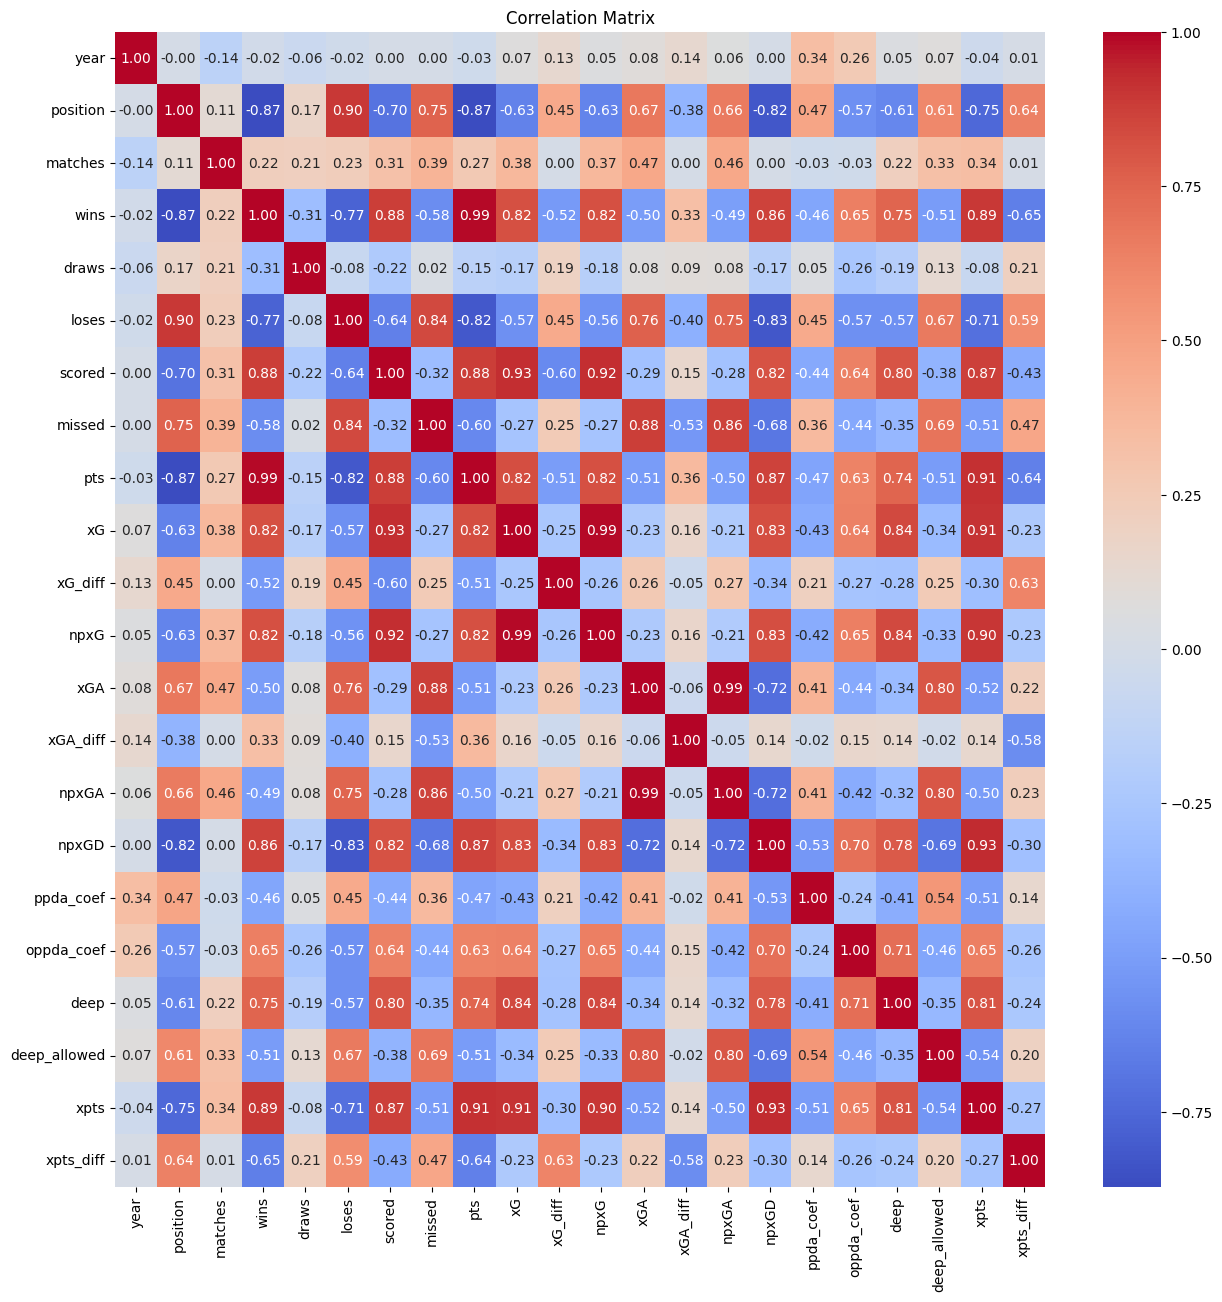

In [14]:
numerical_data_overview = raw_data_overview.select_dtypes(include=['number'])
correlation_matrix_overview = numerical_data_overview.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix_overview, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### Xác định các cặp dữ liệu có độ tương quan cao hơn 0.95

In [15]:
threshold = 0.95

highly_correlated = []
for i in range(len(correlation_matrix_overview.columns)):
    for j in range(i + 1, len(correlation_matrix_overview.columns)):
        if abs(correlation_matrix_overview.iloc[i, j]) > threshold:
            colname1 = correlation_matrix_overview.columns[i]
            colname2 = correlation_matrix_overview.columns[j]
            highly_correlated.append((colname1, colname2))

print("Các cặp dữ liệu có độ tương quan cao:", highly_correlated)

Các cặp dữ liệu có độ tương quan cao: [('wins', 'pts'), ('xG', 'npxG'), ('xGA', 'npxGA')]


**Giải thích**

- `wins` ↔ `pts`: Mỗi trận thắng mang lại 3 điểm, nên số trận thắng có liên hệ trực tiếp với điểm số.

- `xG` ↔ `npxG`: Bàn thắng kỳ vọng (`xG`) thường liên quan trực tiếp đến bàn thắng kỳ vọng không tính phạt đền (`npxG`).

- `xGA` ↔ `npxGA`: Bàn thua kỳ vọng (`xGA`) thường liên quan trực tiếp đến bàn thua kỳ vọng không tính phạt đền (`npxGA`).




**Kết luận**

Dù cho các tính chất có độ tương quan khá cao và nhiều, **tuy nhiên ta xem xét tính khả thi giữa các cột và thấy rằng những mối tương quan cao giữa các cột không phải là lý do đủ mạnh để loại bỏ các tính chất này**, vì:
* Các cột trong dữ liệu không chỉ là số liệu, mà còn mang ý nghĩa chiến thuật, hiệu suất, và kết quả cụ thể trong bóng đá.
* Mỗi cột đại diện cho một khía cạnh khác nhau của hiệu suất đội bóng, dù có tương quan với nhau. Loại bỏ cột có thể làm mất đi thông tin quan trọng và làm méo mó kết quả phân tích.
* Mối quan hệ giữa các biến (dù tương quan cao) thường giúp khám phá các đặc điểm ẩn, xây dựng mô hình, hoặc kiểm tra giả thuyết.


#### **a.5. Chuẩn hóa dữ liệu** <a name="normalization1"></a>

Trong bộ dữ liệu này, ta **không cần thực hiện scaling** vì những lý do sau:
* Nếu chỉ muốn phân tích thống kê, tìm hiểu tương quan hoặc trực quan hóa dữ liệu, thì giữ nguyên thang đo thực tế sẽ giúp duy trì ý nghĩa ngữ cảnh.
* Các đặc trưng như `pts`, `xG`, `xGA`, `wins` đều mang ý nghĩa thực tế trong bóng đá. Giá trị của chúng thể hiện trực tiếp hiệu suất của đội bóng và không cần phải chuẩn hóa để so sánh giữa các đội. Ví dụ: Số điểm (`pts`) thường dao động từ 0–100, trong khi số bàn thắng kỳ vọng (`xG`) có thể chỉ từ 0–3 trong một trận. Tuy nhiên, sự khác biệt về thang đo này không gây cản trở cho việc hiểu dữ liệu trong ngữ cảnh bóng đá.
* Nếu thực hiện scaling, giá trị sau khi chuẩn hóa sẽ mất đi ý nghĩa thực tế. Ví dụ:
`pts = 90` (số điểm thực tế) → Nếu được chuẩn hóa thành 0.9 (dưới Min-Max Scaling), ý nghĩa trực tiếp sẽ bị mất, khó hiểu hơn.
* Các đồ thị như histogram, scatter plot hay box plot thường trực tiếp phản ánh giá trị thực tế của các đặc trưng. Scaling có thể làm biến đổi dữ liệu, khiến kết quả trực quan hóa khó hiểu hoặc không phù hợp với ngữ cảnh.
* Dữ liệu rời rạc và tự nhiên, không có dữ liệu nào có giá trị quá lớn


##### Chuẩn hóa tên cột

In [16]:
raw_data_overview.rename(columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}, inplace=True)
raw_data_overview

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838079   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

#### **a.6. Lưu dữ liệu** <a name="save1"></a>

In [17]:
raw_data_overview.to_csv('data/understat.com_preprocess.csv', index=False)

### **b. Tiền xử lý dữ liệu từ file `understat_per_game.csv`** <a name="preprocess2"></a>

Đây là dữ liệu chi tiết theo từng trận đấu của một đội bóng, trong đó mỗi hàng đại diện cho một trận đấu cụ thể.

#### **b.1. Làm sạch dữ liệu** <a name="clean2"></a>

Tương tự như dữ liệu trên, ta cũng quan sát tổng quát bộ dữ liệu để đưa ra phương pháp xử lý phù hợp

In [18]:
raw_data_details

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
0                 4       2  ...   9.625000       231       24  21.850000   
1                 1       1  ...   4.756098       195       41  17.695652   
2                 3       2  ...   5.060606       167       33  16.961538   
3                 2       0  ...   4.423077       115       26   9.446809   
4                 2       4  ...   4.250000       170       40  44.800000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
0            437         20  Bayern Munich  0.570120  0.198420    -0.6514  
1            407         23  Bayern Munich  0.503280  0.307950     0.5143  
2            441         26  Bayern Munich -0.770130  0.310166    -0.8412  
3            444         47  Bayern Munich  1.035190  0.203118     1.1367  
4            448         10  Bayern Munich -0.517140  0.402844    -0.0713  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[24580 rows x 29 columns]

##### Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


Tiếp theo, chúng ta tính toán số lượng dòng và cột và lưu vào biến 'num_cols_details' và 'num_rows_details'

In [19]:
num_rows_details, num_cols_details =raw_data_details.shape
print(f'Số dòng: {num_rows_details}')
print(f'Số cột: {num_cols_details}')

Số dòng: 24580
Số cột: 29


##### Ý nghĩa của các dòng dữ liệu


Mỗi dòng đại diện cho một trận đấu cụ thể của một đội bóng trong mùa giải. Dòng dữ liệu cung cấp thông tin chi tiết về trận đấu, bao gồm ngày thi đấu, kết quả, chỉ số kỳ vọng, và các thông số liên quan đến pressing hoặc số điểm kỳ vọng.

##### Dữ liệu các dòng có bị lặp không?

Tiếp theo, tính toán số lượng dòng có lặp không và lưu vào biến `duplicated_rows_overview`

In [20]:
duplicated_rows_details = raw_data_details[raw_data_details.duplicated()]
if duplicated_rows_details.empty:
    print("Không có dòng bị lặp trong dữ liệu.")
else:
    print("Có dòng bị lặp trong dữ liệu.")

Không có dòng bị lặp trong dữ liệu.


Như vậy, giữa mỗi dòng không có dữ liệu nào bị lặp

##### Ý nghĩa của các cột dữ liệu

- league: Tên giải đấu.

- year: Năm diễn ra mùa giải.

- h_a: Trận đấu diễn ra trên sân nhà (h) hay sân khách (a).

- xG: Bàn thắng kỳ vọng trong trận đấu.

- xGA: Bàn thua kỳ vọng trong trận đấu.

- npxG: Bàn thắng kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- npxGA: Bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal).

- deep: Số đường chuyền thành công (không bao gồm tạt bóng) của đội trong khu vực 18,3m so với khung thành của đối phương (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142)) trong trận.

- deep_allowed: Số đường chuyền thành công (không bao gồm tạt bóng) của đối phương trong khu vực 18,3m so với khung thành của đội (khu vực [Zone 17](https://www.researchgate.net/figure/The-pitch-of-play-divided-into-18-zones_fig2_336578142)) trong trận.

- scored: Số bàn thắng thực tế trong trận.

- missed: Số bàn thua thực tế trong trận.

- xpts: Số điểm kỳ vọng từ trận đấu.

- result: Kết quả trận đấu (thắng, hòa, thua: w-l-d)

- date: Ngày và giờ diễn ra trận đấu.

- wins: kết quả trận đấu: 1 nếu thắng

- draws: kết quả trận đấu: 1 nếu hòa

- loses: kết quả trận đấu: 1 nếu thua

- pts: Tổng số điểm tính đến thời điểm này.

- npxGD: Sai số giữa bàn thắng và bàn thua kỳ vọng không bao gồm đá phạt trực tiếp (penalty) và phản lưới nhà (own goal) (npxG - npxGA) trong trận.

- ppda_coef: Số đường chuyền thành công trên hành động phòng thủ trên phần sân đối phương, thông số thể hiện khả năng kiểm soát bóng của đội trên phần sân đối phương. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đối phương lên đội trên phần sân của đối phương trong trận.

- oppda_coef: Số đường chuyền thành công trên hành động phòng thủ trên phần sân nhà, thông số thể hiện khả năng kiểm soát bóng của đối phương trên phần sân của đội. Thông số cũng thể hiện khả năng gây áp lực (phòng thủ) của đội lên đối phương trên phần sân nhà của đội trong trận

- ppda_att: Tổng số đường chuyền của đối thủ trong các hành động pressing.

- ppda_def: Tổng số hành động pressing của đội.

- oppda_att: Tổng số đường chuyền của đội bị pressing bởi đối thủ.

- oppda_def: Tổng số hành động pressing của đối thủ.

- team: Tên đội bóng.

- xG_diff: Hiệu số bàn thắng kỳ vọng so với thực tế trong trận.

- xGA_diff: Hiệu số bàn thua kỳ vọng so với thực tế trong trận.

- xpts_diff: Chênh lệch số điểm kỳ vọng so với thực tế trong trận.

##### Kiểu dữ liệu của từng cột

In [21]:
raw_data_details.dtypes

league           object
year              int64
h_a              object
xG              float64
xGA             float64
npxG            float64
npxGA           float64
deep              int64
deep_allowed      int64
scored            int64
missed            int64
xpts            float64
result           object
date             object
wins              int64
draws             int64
loses             int64
pts               int64
npxGD           float64
ppda_coef       float64
ppda_att          int64
ppda_def          int64
oppda_coef      float64
oppda_att         int64
oppda_def         int64
team             object
xG_diff         float64
xGA_diff        float64
xpts_diff       float64
dtype: object

##### Chuẩn hóa kiểu dữ liệu nếu chưa phù hợp

Nhận thấy rằng:
* `year` có kiểu dữ liệu số, tuy nhiên nó thể hiện thời gian thay vì một số. Do đó, ta sẽ chuyển đổi nó thành kiểu `Object` để thể hiện rõ ràng hơn

* `date` là kiểu dữ liệu thể hiển ngày giờ, chính về thế ta sẽ chuẩn hóa nó về dạng datetime

* `wins`, `draws`, `loses` thể hiện 0, 1, do đó ta sẽ chuẩn hóa về `Boolean`


In [22]:
# Chuyển đổi 'year' thành kiểu object
raw_data_details['year'] = raw_data_details['year'].astype('object')

# Chuyển đổi 'date' thành kiểu datetime
raw_data_details['date'] = pd.to_datetime(raw_data_details['date'])

# Chuyển đổi 'wins', 'draws', 'losses' thành kiểu boolean
raw_data_details['wins'] = raw_data_details['wins'].astype(bool)
raw_data_details['draws'] = raw_data_details['draws'].astype(bool)
raw_data_details['loses'] = raw_data_details['loses'].astype(bool)

In [23]:
raw_data_details.dtypes

league                  object
year                    object
h_a                     object
xG                     float64
xGA                    float64
npxG                   float64
npxGA                  float64
deep                     int64
deep_allowed             int64
scored                   int64
missed                   int64
xpts                   float64
result                  object
date            datetime64[ns]
wins                      bool
draws                     bool
loses                     bool
pts                      int64
npxGD                  float64
ppda_coef              float64
ppda_att                 int64
ppda_def                 int64
oppda_coef             float64
oppda_att                int64
oppda_def                int64
team                    object
xG_diff                float64
xGA_diff               float64
xpts_diff              float64
dtype: object

##### Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (`missing_ratio`).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (`num_values`).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (`value_ratios`).

In [24]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)

cat_col_info_details = categorical_analysis(raw_data_details)
cat_col_info_details

column  missing_ratio  num_values  \
0  league            0.0           6   
1    year            0.0           6   
2     h_a            0.0           2   
3  result            0.0           3   
4    date            0.0        6632   
5    wins            0.0           2   
6   draws            0.0           2   
7   loses            0.0           2   
8    team            0.0         168   

                                        value_ratios  
0  {'EPL': 18.6, 'La_liga': 18.6, 'Serie_A': 18.5...  
1  {2014: 16.8, 2015: 16.8, 2016: 16.8, 2017: 16....  
2                             {'h': 50.0, 'a': 50.0}  
3                  {'w': 37.4, 'l': 37.4, 'd': 25.2}  
4  {2019-05-12 14:00:00: 0.1, 2016-04-20 22:45:00...  
5                          {False: 62.6, True: 37.4}  
6                          {False: 74.8, True: 25.2}  
7                          {False: 62.6, True: 37.4}  
8  {'Real Sociedad': 0.9, 'Southampton': 0.9, 'Ma...

##### Với các cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào

Đối với các cột dữ liệu số, ta tính toán
* Tỉ lệ các giá trị bị thiếu
* Giá trị nhỏ nhất
* Giá trị lớn nhất
* Trung bình
* Các Q1(25%), Q3(75%)

Sau đó lưu vào DataFrame `num_col_info`, trong đó:
* Tên các cột là cột có kiểu dữ liệu số
* Tên các dòng là `missing_ratio`, `min`, `lower_quartile`, `median`, `upper_quartile`, `max`

In [25]:
def missing_ratio(s: pd.Series) -> float:
    return round(s.isna().sum() / s.shape[0] * 100, 1)

def lower_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.25), 1)

def median(s: pd.Series) -> float:
    return round(s.median(), 1)

def upper_quartile(s: pd.Series) -> float:
    return round(s.quantile(0.75), 1)

num_col_info_details = raw_data_details.select_dtypes(include='number').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(1)
num_col_info_details

xG  xGA  npxG  npxGA  deep  deep_allowed  scored  missed  \
missing_ratio   0.0  0.0   0.0    0.0   0.0           0.0     0.0     0.0   
min             0.0  0.0   0.0    0.0   0.0           0.0     0.0     0.0   
lower_quartile  0.7  0.7   0.6    0.6   3.0           3.0     0.0     0.0   
median          1.2  1.2   1.0    1.0   5.0           5.0     1.0     1.0   
upper_quartile  1.8  1.8   1.6    1.6   8.0           8.0     2.0     2.0   
max             6.6  6.6   6.6    6.6  42.0          42.0    10.0    10.0   

                xpts  pts  npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
missing_ratio    0.0  0.0    0.0        0.0       0.0       0.0         0.0   
min              0.0  0.0   -6.0        0.0       0.0       0.0         0.0   
lower_quartile   0.7  0.0   -0.7        7.0     179.0      19.0         7.0   
median           1.3  1.0    0.0        9.5     231.0      24.0         9.5   
upper_quartile   2.1  3.0    0.7       13.1     290.0      29.0        13.1   
max              3.0  3.0    6.0      152.0     764.0      65.0       152.0   

                oppda_att  oppda_def  xG_diff  xGA_diff  xpts_diff  
missing_ratio         0.0        0.0      0.0       0.0        0.0  
min                   0.0        0.0     -5.9      -5.9       -3.0  
lower_quartile      179.0       19.0     -0.6      -0.6       -0.7  
median              231.0       24.0      0.1       0.1        0.1  
upper_quartile      290.0       29.0      0.6       0.6        0.7  
max                 764.0       65.0      5.1       5.1        2.9

#### **b.2. Xử lý dữ liệu thiếu** <a name="missing2"></a>

##### Thống kế tỉ lệ dữ liệu bị thiếu

In [26]:
dict(num_col_info_details.iloc[0])

{'xG': 0.0,
 'xGA': 0.0,
 'npxG': 0.0,
 'npxGA': 0.0,
 'deep': 0.0,
 'deep_allowed': 0.0,
 'scored': 0.0,
 'missed': 0.0,
 'xpts': 0.0,
 'pts': 0.0,
 'npxGD': 0.0,
 'ppda_coef': 0.0,
 'ppda_att': 0.0,
 'ppda_def': 0.0,
 'oppda_coef': 0.0,
 'oppda_att': 0.0,
 'oppda_def': 0.0,
 'xG_diff': 0.0,
 'xGA_diff': 0.0,
 'xpts_diff': 0.0}

Sau khi thống kê dữ liệu, chúng ta thấy rằng nếu các dữ liệu có tỉ lệ thiếu quá nhiều sẽ dẫn đến thiếu nhiều và không sử dụng được nhiều, nên ta có thể xóa nó

Nếu dữ liệu bị thiếu lớn hơn 75%, ta sẽ xóa cột đó và cập nhật lại Dataframe

##### Xóa cột có tỉ lệ thiếu trên 75%

In [27]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_overview.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    copy = df.copy()
    cols = []
    for key, value in missing_lst.items():
        if value > threshold:
            cols.append(key)
    if len(cols) > 0:
        copy.drop(cols, axis=1, inplace=True)
        print(f"Xóa cột: {cols}")
    else:
        print("Không xóa cột nào")
    return copy

raw_data_details = drop_missing_features(raw_data_details, dict(num_col_info_details.iloc[0]))

Không xóa cột nào


Ta thấy rằng sau khi kiểm tra, không có cột nào bị thiếu dữ liệu

#### **b.3. Xử lý dữ liệu bị nhiễu bằng dùng IQR** <a name="iqr2"></a>

Phương pháp IQR (Interquartile Range) là một cách phổ biến để xử lý dữ liệu bị nhiễu bằng cách loại bỏ các giá trị nằm ngoài khoảng từ $𝑄_1 − 1.5 × 𝐼𝑄𝑅$ đến $𝑄_3 + 1.5 × 𝐼𝑄𝑅$. Tuy nhiên, phương pháp này có những hạn chế khi áp dụng cho dữ liệu trong file này do:

* Phương pháp IQR giả định rằng dữ liệu có sự phân bố ổn định, nhưng trong dữ liệu bóng đá, các chỉ số như bàn thắng kỳ vọng (`xG`), bàn thua kỳ vọng (`xGA`) hay số điểm thường không tuân theo phân phối chuẩn.
* Những giá trị "ngoại lệ" trong dữ liệu không nhất thiết là lỗi, mà có thể là: một đội bóng có hiệu suất vượt trội (ghi nhiều bàn hơn bình thường, như 8 bàn trong một trận).
Một trận đấu hiếm hoi với kết quả không thường thấy (ví dụ: 7–2).
Trong bóng đá, các trường hợp bất thường này là phần tự nhiên của dữ liệu và không nên được loại bỏ hoặc điều chỉnh.
* Trận đấu với `xG` cao có thể là do đối thủ yếu hoặc lối chơi tấn công mạnh mẽ.
* Một trận đấu có chỉ số kỳ vọng cao bất thường (ví dụ: `xG = 5.0`) có thể là do một chiến thắng áp đảo. Loại bỏ các trận như vậy sẽ làm mất thông tin về xu hướng hoặc khả năng bùng nổ của đội.

**Loại bỏ dữ liệu như vậy sẽ làm mất thông tin quan trọng về các đội hoặc trận đấu có hiệu suất đặc biệt. Các yếu tố ngữ cảnh này không thể hiện qua IQR và việc loại bỏ "nhiễu" sẽ làm giảm độ chính xác của phân tích.**

#### **b.4. Giảm chiều dữ liệu** <a name="reduce_dim2"></a>

#####Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

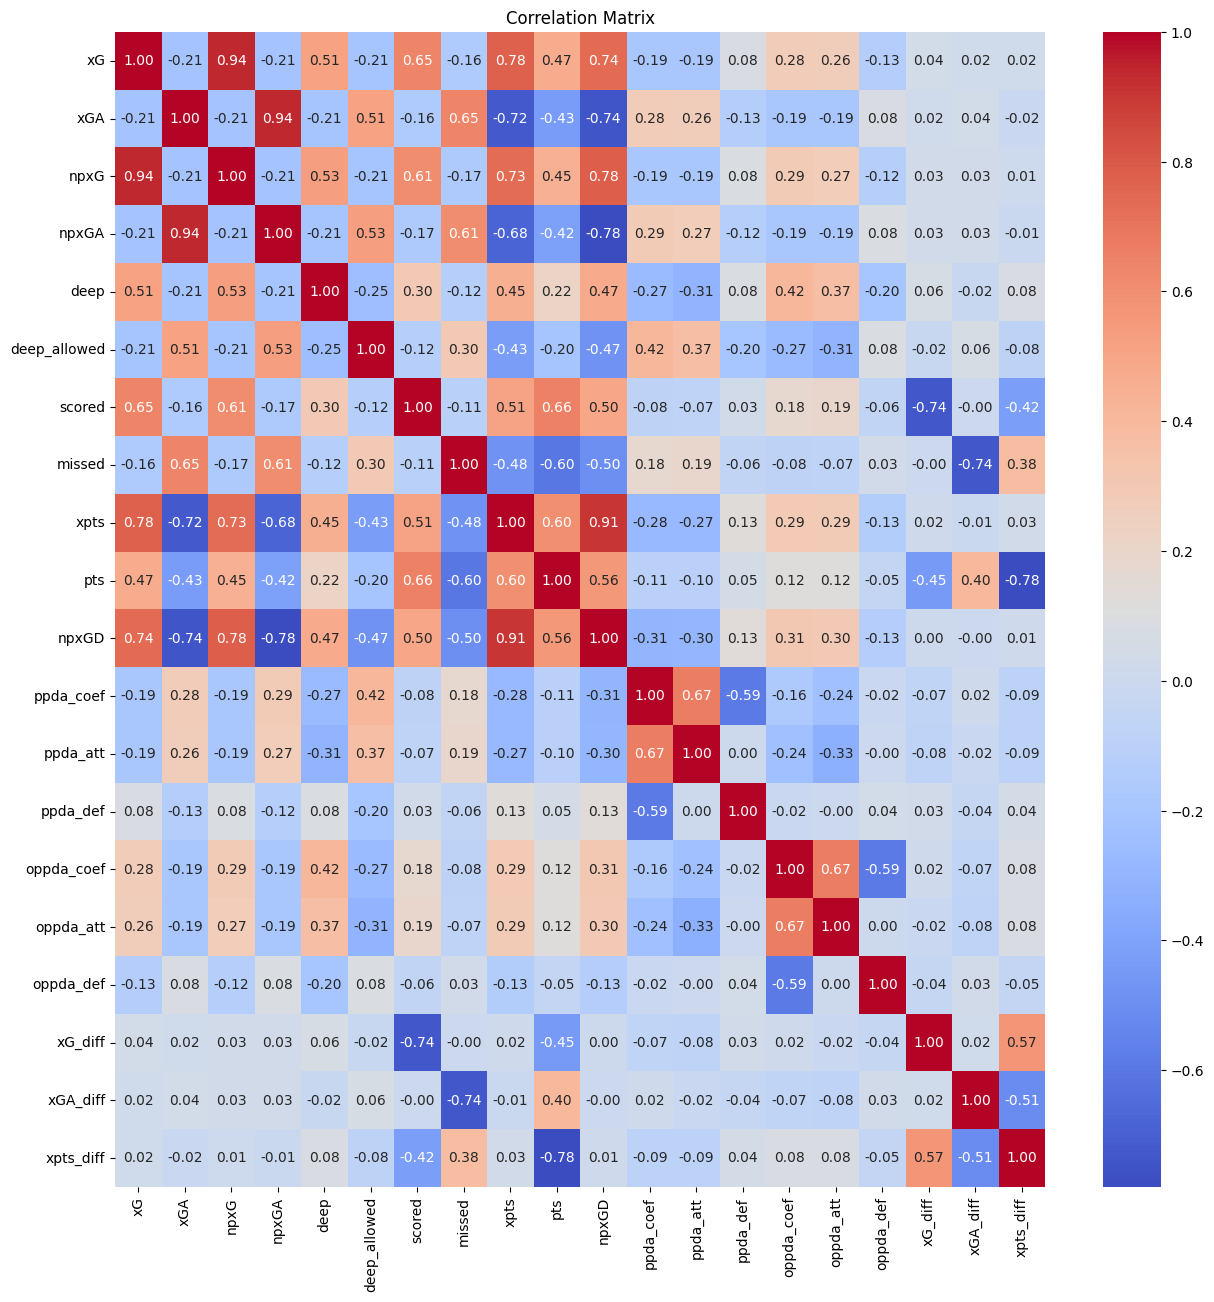

In [28]:
numerical_data_details = raw_data_details.select_dtypes(include=['number'])

correlation_matrix_details = numerical_data_details.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix_details, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### Xác định các cặp dữ liệu có độ tương quan cao hơn 0.9

In [29]:
threshold = 0.9

highly_correlated = []
for i in range(len(correlation_matrix_details.columns)):
    for j in range(i + 1, len(correlation_matrix_details.columns)):
        if abs(correlation_matrix_details.iloc[i, j]) > threshold:
            colname1 = correlation_matrix_details.columns[i]
            colname2 = correlation_matrix_details.columns[j]
            highly_correlated.append((colname1, colname2))

print("Các cặp dữ liệu có độ tương quan cao:", highly_correlated)

Các cặp dữ liệu có độ tương quan cao: [('xG', 'npxG'), ('xGA', 'npxGA'), ('xpts', 'npxGD')]


Tuy nhiên, ta chọn không xóa cột nào. Việc không xóa các cặp dữ liệu có độ tương quan cao như **(`xG`, `npxG`), (`xGA`, `npxGA`), và (`xpts`, `npxGD`)** dù chúng có độ tương quan cao là do chúng mang ý nghĩa ngữ cảnh riêng và giá trị thực tế trong dữ liệu bóng đá như sau:
* Độ tương quan cao giữa `xG` và `npxG` là do penalty thường chiếm tỷ lệ nhỏ trong tổng số bàn thắng, nhưng chúng không hoàn toàn giống nhau. Trong một số phân tích, ta cần biết hiệu suất ghi bàn tổng thể (`xG`) hoặc hiệu suất không bao gồm yếu tố ngoại lệ như penalty (`npxG`). Cả hai đều mang giá trị phân tích quan trọng.
* Tương tự như trên, mặc dù `xGA` và `npxGA` tương quan cao, chúng đại diện cho các khía cạnh phòng thủ khác nhau.
* xpts thường được dùng để so sánh kết quả kỳ vọng với kết quả thực tế (đánh giá hiệu suất tổng thể), trong khi npxGD cung cấp chi tiết về khả năng tấn công và phòng thủ không liên quan đến penalty. Nên ta cũng chọn không xóa
* Các chỉ số như `xG`, `npxG`, `xpts` không chỉ là con số mà còn chứa đựng ngữ cảnh chiến thuật và cách đội bóng thi đấu. Xóa một trong số đó sẽ làm mất đi một phần quan trọng của câu chuyện.

Tuy nhiên ở đây, ta nhận ra là Result-Wins-Draws-Loses đang bị trùng dữ liệu với nhau: khi Result là 'w', thì wins sẽ cho biến 1, draws và loses sẽ là biến 0; tương tự cho 'd' và 'l'

**=> Ta tiến hành xóa 3 cột `Wins`, `Draws`, `Loses` giúp giảm chiều dữ liệu, giảm độ phức tạp ở các bước sau**

In [30]:
raw_data_details.drop(columns=['wins', 'draws', 'loses'], inplace=True)

print(raw_data_details.shape)
raw_data_details.head()

(24580, 26)


league  year h_a       xG       xGA     npxG     npxGA  deep  \
0  Bundesliga  2014   h  2.57012  1.198420  2.57012  1.198420     5   
1  Bundesliga  2014   a  1.50328  1.307950  1.50328  1.307950    10   
2  Bundesliga  2014   h  1.22987  0.310166  1.22987  0.310166    13   
3  Bundesliga  2014   a  1.03519  0.203118  1.03519  0.203118     6   
4  Bundesliga  2014   h  3.48286  0.402844  3.48286  0.402844    23   

   deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
0             4       2  ...   9.625000       231       24  21.850000   
1             1       1  ...   4.756098       195       41  17.695652   
2             3       2  ...   5.060606       167       33  16.961538   
3             2       0  ...   4.423077       115       26   9.446809   
4             2       4  ...   4.250000       170       40  44.800000   

   oppda_att  oppda_def           team  xG_diff  xGA_diff  xpts_diff  
0        437         20  Bayern Munich  0.57012  0.198420    -0.6514  
1        407         23  Bayern Munich  0.50328  0.307950     0.5143  
2        441         26  Bayern Munich -0.77013  0.310166    -0.8412  
3        444         47  Bayern Munich  1.03519  0.203118     1.1367  
4        448         10  Bayern Munich -0.51714  0.402844    -0.0713  

[5 rows x 26 columns]

#### **b.5. Chuẩn hóa dữ liệu** <a name="normalization2"></a>

Ta cũng sẽ **không thực hiện việc scaling** cho data này vì những lý do sau:
* Các giá trị này có thang đo tự nhiên, phản ánh hiệu suất thực tế trong ngữ cảnh bóng đá: Ví dụ: `xG` có thể dao động từ 0 đến khoảng 5, còn `pts` chỉ có các giá trị rời rạc (0, 1, hoặc 3). Thang đo khác biệt giữa các cột không ảnh hưởng đến việc hiểu dữ liệu, vì chúng đều đại diện cho các khía cạnh cụ thể và có ý nghĩa riêng.
* Nếu thực hiện scaling, các giá trị sẽ mất ý nghĩa trực tiếp: scored = 2 (2 bàn thắng) → Sau scaling, giá trị có thể trở thành 0.2, làm giảm tính trực quan và khó hiểu trong phân tích.
* Khi tính các thống kê như trung bình, phương sai, hoặc tương quan, việc giữ nguyên giá trị gốc sẽ giúp bạn dễ dàng đưa ra các nhận xét dựa trên thực tế: trung bình số bàn thắng (scored) là 1.5 → Giá trị này có ý nghĩa rõ ràng hơn là một số sau khi chuẩn hóa, chẳng hạn 0.38.
* Các đồ thị như histogram, scatter plot hay box plot thường trực tiếp phản ánh giá trị thực tế của các đặc trưng. Scaling có thể làm biến đổi dữ liệu, khiến kết quả trực quan hóa khó hiểu hoặc không phù hợp với ngữ cảnh.
* Dữ liệu rời rạc, tự nhiên và nhỏ nên không cần thực hiện việc scaling

#### **b.6. Lưu dữ liệu** <a name="save2"></a>

In [31]:
raw_data_details.to_csv('data/understat_per_game_preprocess.csv', index=False)

### **c. Tổng hợp dữ liệu đã xử lý** <a name="summary"></a>

#### Đọc dữ liệu sau khi đã xử lý và thực hiện merge data

In [32]:
df_details = pd.read_csv('data/understat_per_game_preprocess.csv')
df_overview = pd.read_csv('data/understat.com_preprocess.csv')

df_overview_position = df_overview[['team', 'year', 'league', 'position']]
merged_data = pd.merge(df_details, df_overview_position, on=['team', 'year', 'league'], how='left')
merged_data

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_att  ppda_def oppda_coef oppda_att  \
0                 4       2  ...       231        24  21.850000       437   
1                 1       1  ...       195        41  17.695652       407   
2                 3       2  ...       167        33  16.961538       441   
3                 2       0  ...       115        26   9.446809       444   
4                 2       4  ...       170        40  44.800000       448   
...             ...     ...  ...       ...       ...        ...       ...   
24575             6       1  ...       310        20  19.600000       294   
24576             7       1  ...       253        20  14.600000       292   
24577             7       3  ...       248        18  12.888889       348   
24578            10       2  ...       280        11  10.600000       212   
24579             6       2  ...       247        24  16.750000       268   

       oppda_def           team   xG_diff  xGA_diff  xpts_diff  position  
0             20  Bayern Munich  0.570120  0.198420    -0.6514         1  
1             23  Bayern Munich  0.503280  0.307950     0.5143         1  
2             26  Bayern Munich -0.770130  0.310166    -0.8412         1  
3             47  Bayern Munich  1.035190  0.203118     1.1367         1  
4             10  Bayern Munich -0.517140  0.402844    -0.0713         1  
...          ...            ...       ...       ...        ...       ...  
24575         15          Lecce -0.551846 -0.412350     0.1597        18  
24576         20          Lecce  0.699320 -1.553321     2.4418        18  
24577         27          Lecce -0.464890 -0.040900    -0.5675        18  
24578         20          Lecce  0.247360 -0.310730     1.1019        18  
24579         16          Lecce -0.065160  0.554200    -1.2913        18  

[24580 rows x 27 columns]

#### Tương quan giữa các biến sau khi xử lý


**Ma trận tương quan của các biến của dữ liệu `overview`**

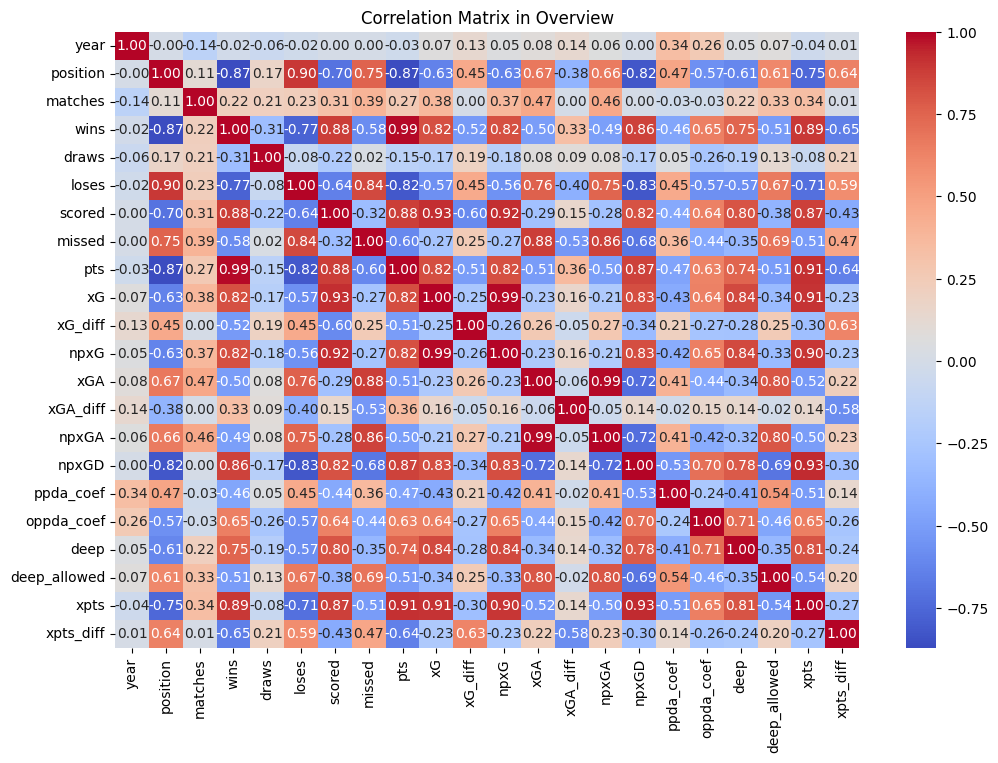

In [33]:
correlation_matrix_overview = df_overview.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_overview, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Overview")
plt.show()

**Ma trận tương quan của các biến của dữ liệu `details`**

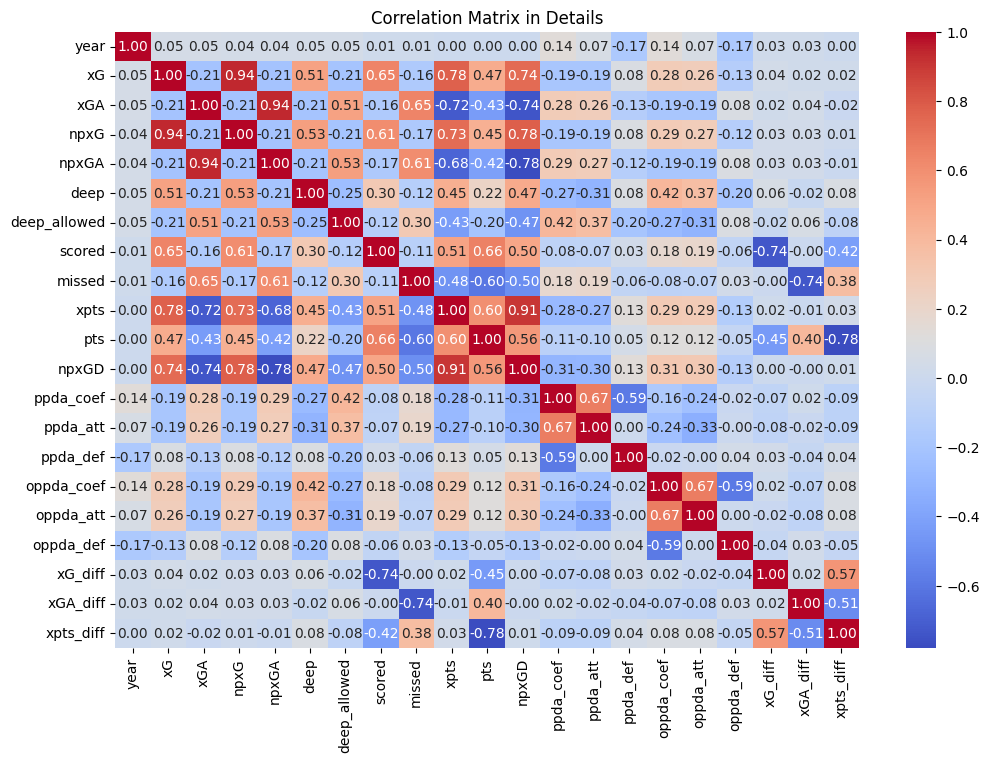

In [34]:
correlation_matrix_details = df_details.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_details, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Details")
plt.show()

## **3. Trả lời câu hỏi (Answer meaningful questions)** <a name="questions"></a>

### Câu 1: Tỷ lệ thắng của các trận đấu khi diễn ra trên sân nhà và trên sân khách qua từng mùa giải (năm) như thế nào? Điều này có chứng minh được lợi thế sân nhà không? <a name="q1"></a>


**Ý nghĩa của câu hỏi**

Trả lời câu hỏi này sẽ giúp chúng ta:

- Hiểu được sự khác biệt về tỷ lệ thắng của các đội bóng khi chơi trên sân nhà và sân khách qua các mùa giải.
- Đánh giá ảnh hưởng của yếu tố sân bãi đến kết quả thi đấu của các đội bóng.

**Lợi ích khi trả lời câu hỏi**


- Truyền thống bóng đá cho thấy nhiều đội bóng có lợi thế khi thi đấu trên sân nhà, nhờ vào sự cổ vũ của khán giả và quen thuộc với môi trường thi đấu. Việc xác định tỷ lệ thắng sân nhà có thể giúp hiểu rõ hơn về mức độ tận dụng lợi thế này.


- Việc phân tích tỷ lệ thắng trên sân khách giúp chỉ ra khả năng thi đấu xa nhà của đội bóng. Nếu tỷ lệ thắng sân khách thấp hơn, điều này có thể chỉ ra các yếu tố như chiến thuật không phù hợp, áp lực từ đám đông, hoặc sự mệt mỏi do di chuyển.

- Câu hỏi giúp phân biệt các đội bóng có phong độ ổn định (thắng cả sân nhà và sân khách) và các đội bóng chỉ mạnh khi thi đấu trên sân nhà. Điều này có thể hữu ích trong việc xác định các đội có khả năng tranh chấp vô địch hoặc đội dễ bị tổn thương khi phải thi đấu xa nhà.

- Nếu tỷ lệ thắng sân khách thấp hơn nhiều so với sân nhà, các huấn luyện viên có thể cần điều chỉnh chiến thuật, chẳng hạn như thay đổi đội hình, phong cách chơi hoặc tăng cường sự chuẩn bị tâm lý cho cầu thủ khi thi đấu xa nhà.


#### Thống kê tỉ lệ thắng giữa sân nhà và sân khách qua các năm

In [63]:
win_ratio = df_details.groupby(['year', 'h_a']).apply(
    lambda group: (group['result'] == 'w').sum() / len(group)
).reset_index(name='win_ratio')

win_ratio

<ipython-input-63-a7f797c0c632>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_ratio = df_details.groupby(['year', 'h_a']).apply(


year h_a  win_ratio
0   2014   a   0.292352
1   2014   h   0.448693
2   2015   a   0.299129
3   2015   h   0.439497
4   2016   a   0.280252
5   2016   h   0.484511
6   2017   a   0.302517
7   2017   h   0.448693
8   2018   a   0.292352
9   2018   h   0.445305
10  2019   a   0.320918
11  2019   h   0.432143

#### Trực quan hoá bằng biểu đồ đường

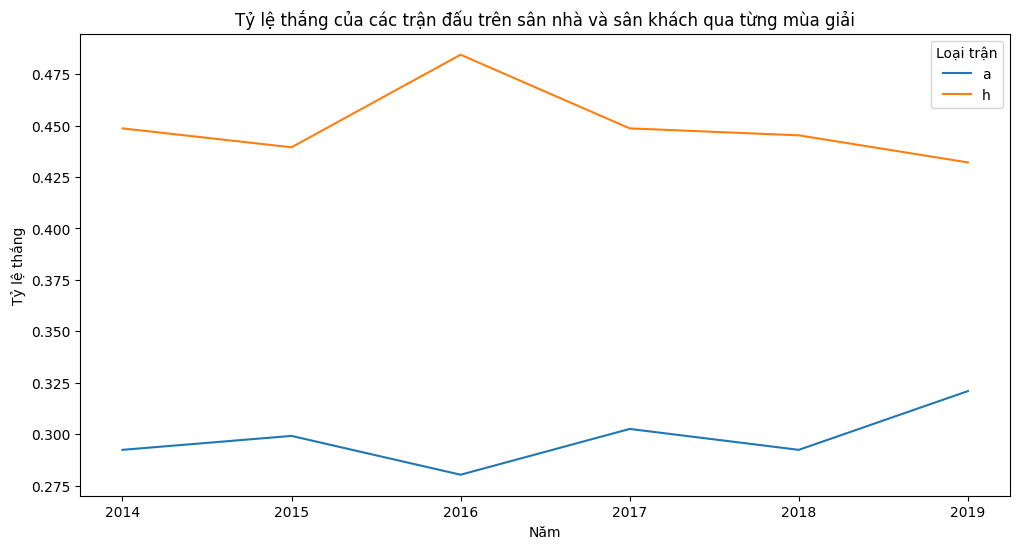

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=win_ratio, x='year', y='win_ratio', hue='h_a')
plt.title('Tỷ lệ thắng của các trận đấu trên sân nhà và sân khách qua từng mùa giải')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ thắng')
plt.legend(title='Loại trận')
plt.show()

**Nhận xét**
- Lợi thế sân nhà: Qua biểu đồ, ta thấy rõ ràng tỷ lệ thắng của các trận đấu sân nhà luôn cao hơn so với các trận đấu sân khách trong suốt giai đoạn thống kê. Điều này khẳng định lợi thế sân nhà là một yếu tố quan trọng ảnh hưởng đến kết quả các trận đấu.
- Sự biến động: Tỷ lệ thắng của cả trận sân nhà và sân khách đều có sự biến động qua các năm. Tuy nhiên, xu hướng chung cho thấy tỷ lệ thắng sân nhà có xu hướng tăng cao hơn so với tỷ lệ thắng sân khách, đặc biệt là vào năm 2016.

**=> Tóm lại, yếu tố thi đấu ở sân nhà hay sân khách đóng vai trò rất quan trọng trong việc thắng thua của 1 trận đấu, có thể do các yếu tố như: hiểu biết về điểm mạnh của sân nhà, môi trường quen thuộc, sự cổ vũ từ khán giả,..giúp cho việc 1 đội được thi trên sân nhà luôn có tỉ lệ thắng cao hơn thi ở sân khách**

### Câu 2: Liệu một đội có số trận thắng cao, số trận thua ít thì có xếp hạng cao hơn không? Thống kê trung bình thắng-hòa-thua giữa các thứ hạng. <a name="q2"></a>



**Ý nghĩa của câu hỏi:**  
Hiểu rõ sự khác biệt về hiệu suất thi đấu giữa các đội có thứ hạng cao và thấp, cụ thể là số trận thắng, hòa và thua trung bình. Điều này giúp làm sáng tỏ yếu tố nào quan trọng nhất để đạt thứ hạng cao.


**Lợi ích khi trả lời câu hỏi:**

Hỗ trợ các đội xác định mục tiêu cụ thể, chẳng hạn như tối thiểu hóa số trận thua hoặc tăng số trận thắng để cải thiện thứ hạng.

#### Thống kế giá trị trung bình của tổng số bàn thắng, thua và hoà giữa 20 thứ hạng

In [37]:
rank_stats = df_overview.groupby("position")[["wins", "draws", "loses"]].mean().reset_index()
rank_stats

position       wins      draws      loses
0          1  26.444444   5.555556   3.694444
1          2  22.666667   7.305556   5.750000
2          3  20.055556   9.000000   6.666667
3          4  18.555556   8.777778   8.388889
4          5  17.333333   8.166667  10.222222
5          6  15.638889   9.583333  10.500000
6          7  14.666667   9.166667  11.888889
7          8  13.277778  10.277778  12.138889
8          9  12.722222   9.638889  13.333333
9         10  11.888889  10.055556  13.750000
10        11  11.250000  10.055556  14.361111
11        12  11.000000   9.750000  14.944444
12        13  10.416667   9.388889  15.916667
13        14   9.694444   9.527778  16.500000
14        15   9.222222   9.750000  16.722222
15        16   8.638889   8.972222  18.083333
16        17   8.466667  10.600000  17.766667
17        18   8.033333   8.466667  20.333333
18        19   7.041667   8.666667  21.875000
19        20   5.000000   8.458333  24.083333

#### Trực quan hoá bằng biểu đồ cột ba

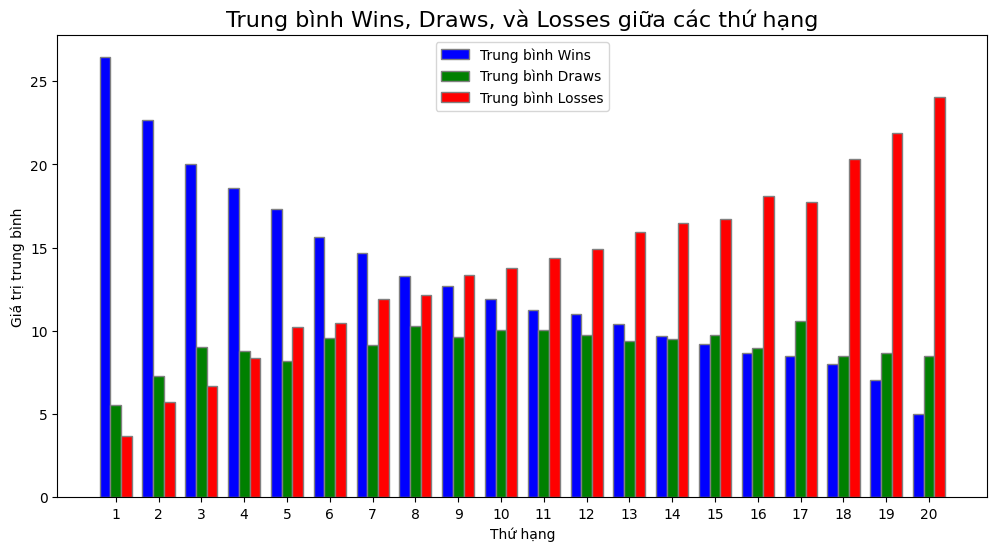

In [38]:
barWidth = 0.25

r1 = np.arange(len(rank_stats["wins"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, rank_stats["wins"], color="blue", width=barWidth, edgecolor="grey", label="Trung bình Wins")
plt.bar(r2, rank_stats["draws"], color="green", width=barWidth, edgecolor="grey", label="Trung bình Draws")
plt.bar(r3, rank_stats["loses"], color="red", width=barWidth, edgecolor="grey", label="Trung bình Losses")

plt.xlabel("Thứ hạng")
plt.ylabel("Giá trị trung bình")
plt.xticks([r + barWidth for r in range(len(rank_stats["wins"]))], rank_stats["position"])
plt.title("Trung bình Wins, Draws, và Losses giữa các thứ hạng", fontsize=16)
plt.legend()
plt.show()

**Nhận xét**
- Nhìn chung, các đội có Ranking cao (vị trí đầu bảng) có số trận thắng (Wins) cao hơn, số trận hòa (Draws) và thua (Losses) ít hơn.
- Các đội có Ranking thấp (vị trí cuối bảng) có số trận thắng thấp hơn, số trận hòa và thua cao hơn.
- Từ vị trí 1 đến 20, ta thấy một sự suy giảm rõ rệt về số trận thắng. Ví dụ, đội xếp hạng 1 có 26.4 trận thắng, trong khi đội xếp hạng 20 chỉ có 5.0 trận thắng.
- Số trận thua của các đội cũng tăng dần theo thứ hạng, từ 3.7 trận thua ở đội xếp hạng 1 lên tới 24 trận thua ở đội xếp hạng 20.

- Số trận hòa của các đội có sự dao động nhỏ, với đội đứng hạng cao nhất có 5.5 trận hòa, trong khi đội xếp hạng 20 có 8.5 trận hòa. Tuy nhiên, các đội ở vị trí giữa bảng xếp hạng có số trận hòa khá ổn định và gần như không có sự chênh lệch quá lớn.

**=> Như vậy, ta có thể kết luận rằng, để một đội bóng có xếp hạng cuối cùng cao thì số bàn thắng nhiều, bàn thua ít là một yếu tố cực kì quan trọng**

### Câu 3: Đội bóng nào có hiệu suất tốt nhất trong mỗi giải đấu? <a name="q3"></a>

**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm xác định đội bóng có hiệu suất tốt nhất trong mỗi giải đấu, tức là đội bóng đạt được kết quả xuất sắc nhất về mặt chiến thắng, bàn thắng ghi được, phòng ngự, và các chỉ số quan trọng khác trong suốt mùa giải. Đây là một cách đánh giá tổng thể về sự xuất sắc và ưu việt của các đội bóng trong mỗi giải đấu, từ đó đưa ra cái nhìn khách quan về các đội bóng mạnh nhất trong từng mùa giải.

**Lợi ích khi trả lời câu hỏi**

Trả lời câu hỏi này giúp nhận diện được đội bóng có hiệu suất xuất sắc nhất trong từng giải đấu, dựa trên các chỉ số quan trọng như số bàn thắng ghi được, hiệu suất phòng ngự, tỷ lệ thắng, và các chỉ số thống kê khác. Điều này giúp các chuyên gia và người hâm mộ hiểu rõ hơn về những đội bóng vượt trội trong giải đấu.


#### Thống kê đội bóng có hiệu suất tốt nhất qua mỗi giải đấu bằng tỉ lệ thắng

In [39]:
df_overview['win_rate'] = df_overview['wins'] / df_overview['matches']
best_teams_by_league = df_overview.loc[df_overview.groupby('league')['win_rate'].idxmax()][['league', 'team', 'win_rate', 'matches', 'wins']]
best_teams_by_league

league                 team  win_rate  matches  wins
258  Bundesliga        Bayern Munich  0.823529       34    28
180         EPL      Manchester City  0.842105       38    32
0       La_liga            Barcelona  0.789474       38    30
568     Ligue_1  Paris Saint Germain  0.814815       27    22
620        RFPL       Spartak Moscow  0.733333       30    22
408     Serie_A             Juventus  0.789474       38    30

#### Trực quan hoá bằng biểu đồ cột ngang

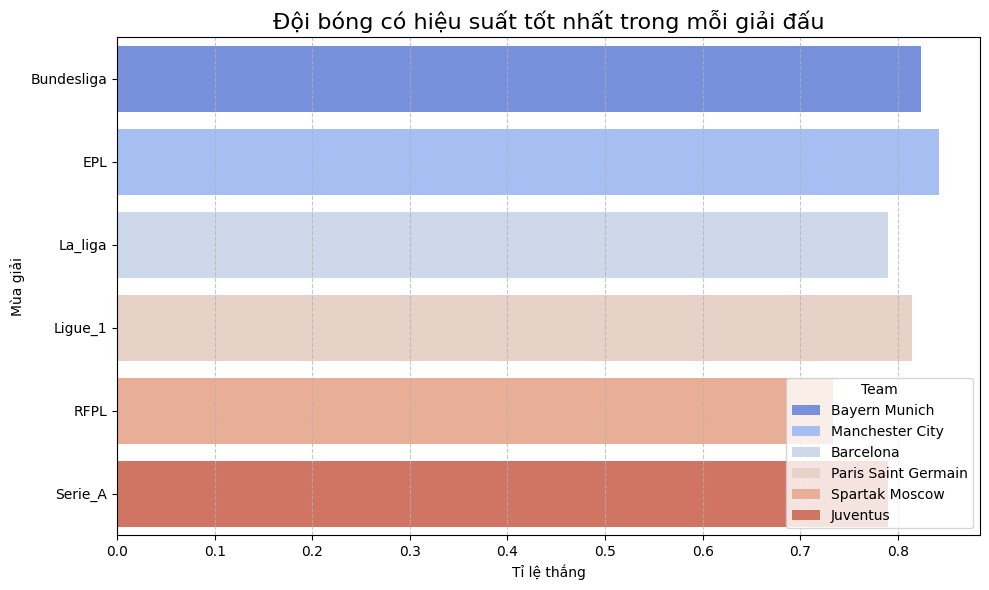

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_teams_by_league, x='win_rate', y='league', hue='team', palette='coolwarm')
plt.title("Đội bóng có hiệu suất tốt nhất trong mỗi giải đấu", fontsize=16)
plt.xlabel("Tỉ lệ thắng")
plt.ylabel("Mùa giải")
plt.legend(title="Team", loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**

Biểu đồ này cho thấy sự vượt trội của các đội bóng lớn trong các giải đấu hàng đầu như Bundesliga, EPL, La Liga, và Serie A. Các đội như Bayern Munich, Manchester City, và Juventus không chỉ thể hiện sự thống trị trong nước mà còn phản ánh chất lượng cao về đội hình và chiến thuật. Những đội bóng này thường có tỷ lệ thắng cao và duy trì sự ổn định trong suốt mùa giải.





### Câu 4: Các chỉ số như `deep` và `deep_allowed` có mối quan hệ thế nào với thứ hạng cuối cùng? <a name="q4"></a>

**Ý nghĩa của câu hỏi**

- Chỉ số deep (số lần chạm bóng hoặc hành động quan trọng trong khu vực tấn công sâu, gần khung thành đối thủ) phản ánh mức độ hiệu quả trong việc đưa bóng vào khu vực nguy hiểm, tạo cơ hội ghi bàn.
- Ngược lại, deep_allowed (số lần để đối thủ thực hiện hành động trong khu vực phòng ngự của mình) thể hiện khả năng phòng ngự và hạn chế cơ hội nguy hiểm từ đối thủ.
- Câu hỏi này giúp đánh giá xem khả năng kiểm soát và tận dụng khu vực nguy hiểm trên sân có mối tương quan như thế nào với kết quả thứ hạng cuối cùng của một đội bóng trong mùa giải.

**Lợi ích khi trả lời câu hỏi**

Nếu phân tích cho thấy các đội có thứ hạng cao thường có deep cao và deep_allowed thấp, các đội bóng khác có thể tập trung cải thiện khả năng đưa bóng vào khu vực nguy hiểm và nâng cao khả năng phòng ngự tại các vị trí quan trọng.
Các huấn luyện viên có thể sử dụng dữ liệu này để điều chỉnh chiến thuật phù hợp, như gia tăng áp lực trong khu vực tấn công hoặc củng cố hàng thủ ở khu vực sâu.


#### Thống kê giá trị deep và deep_allowed giữa các thứ hạng

In [41]:
position_stats = merged_data.groupby('position')[['deep', 'deep_allowed']].mean().reset_index()
position_stats

position       deep  deep_allowed
0          1  10.264591      3.817899
1          2   8.799378      4.377138
2          3   7.838258      4.468118
3          4   7.488336      4.838258
4          5   6.972006      5.202177
5          6   6.251166      5.371695
6          7   5.688958      5.440902
7          8   5.653696      5.707393
8          9   5.263035      6.021012
9         10   4.943191      6.061479
10        11   4.888629      6.094237
11        12   5.056031      6.197665
12        13   4.455677      6.520218
13        14   4.715397      6.241835
14        15   4.756420      6.706615
15        16   4.346304      6.627237
16        17   4.675113      6.468778
17        18   4.541176      6.859729
18        19   4.123060      7.062084
19        20   4.051054      7.041065

#### Trực quan hoá bằng biểu đồ cột đôi

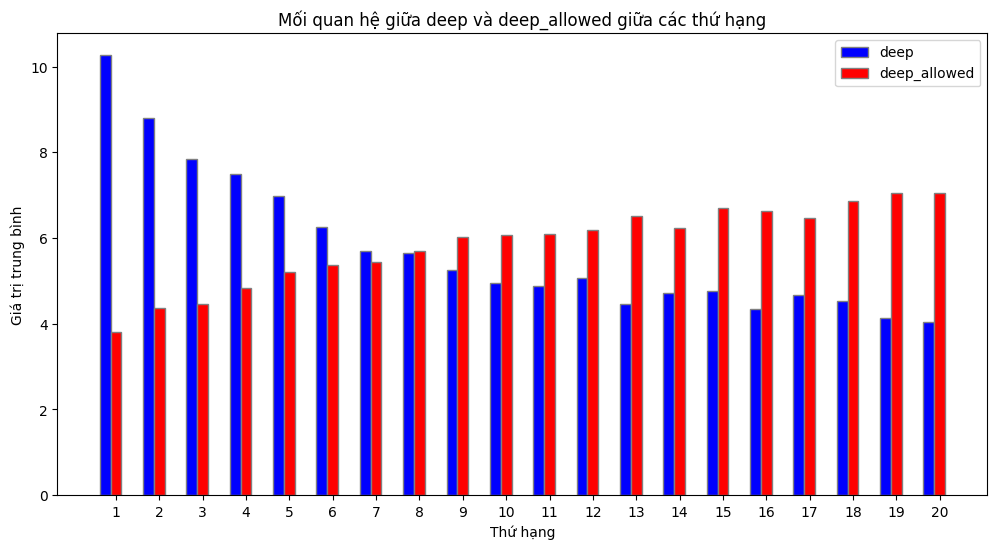

In [42]:
barWidth = 0.25
r1 = np.arange(len(position_stats['position']))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, position_stats['deep'], color='blue', width=barWidth, edgecolor='grey', label='deep')
plt.bar(r2, position_stats['deep_allowed'], color='red', width=barWidth, edgecolor='grey', label='deep_allowed')
plt.title('Mối quan hệ giữa deep và deep_allowed giữa các thứ hạng')
plt.xlabel('Thứ hạng')
plt.ylabel('Giá trị trung bình')
plt.xticks([r + barWidth for r in range(len(position_stats['position']))], position_stats['position'])
plt.legend()
plt.show()

**Nhận xét**
- Các đội ở vị trí cao hơn trên bảng xếp hạng (top 1 đến 4) có giá trị trung bình của chỉ số deep cao hơn hẳn so với các đội ở nhóm cuối (vị trí 17-20). Điều này cho thấy các đội mạnh hơn thường tạo được nhiều tình huống nguy hiểm ở khu vực 1/3 cuối sân của đối phương.
- Ngược lại, các đội ở cuối bảng xếp hạng có giá trị deep_allowed cao hơn, tức là họ để đối thủ xâm nhập khu vực 1/3 cuối sân của mình nhiều hơn. Điều này phản ánh khả năng phòng ngự yếu kém của họ.
- Các đội ở giữa bảng xếp hạng (vị trí 7-14) có sự cân bằng hơn giữa chỉ số deep và deep_allowed. Điều này cho thấy họ có khả năng tấn công và phòng ngự ở mức trung bình, không quá vượt trội nhưng cũng không yếu kém.

**$\Rightarrow$ Tóm lại, chỉ số `deep` có ảnh hưởng mạnh mẽ đến vị trí xếp hạng cuối cùng.**

### Câu 5: Mối quan hệ giữa số điểm thực tế (pts) và số điểm kỳ vọng (xpts) là gì? Top 5 đội bóng của năm gần đây nhất của mỗi giải đấu được kỳ vọng và họ thể hiện thế nào? Sự kỳ vọng (xpts) có ảnh hưởng đến thứ hạng cuối không <a name="q5"></a>


**Ý nghĩa của câu hỏi**

Câu hỏi này giúp bạn phân tích sự khác biệt giữa điểm thực tế và điểm kỳ vọng của các đội bóng.
- Nếu pts > xpts, có thể là đội bóng đó có thành tích vượt trội
- Nếu pts < xpts, đội bóng đó có thể chưa tận dụng hết cơ hội và phòng ngự chưa tốt.

**Lợi ích khi trả lời câu hỏi**

Câu hỏi này cung cấp cái nhìn về sự khác biệt giữa kết quả thực tế của các đội và những gì được dự đoán từ các chỉ số kỳ vọng. Nó giúp bạn phân tích các đội vượt qua kỳ vọng hoặc kém hơn so với kỳ vọng.

#### Preprocess
Để dễ dàng quan sát, ta thực hiện việc preprocess như sau:
- Nếu pts > xpts, ta thêm cột 'Performance' và giá trị nó mang là 'Best Performance'
- Ngược lại nếu pts < xpts, sẽ mang giá trị 'Poor Performance'

In [43]:
df_overview['performance'] = np.where(df_overview['pts'] > df_overview['xpts'], 'best performance', 'poor performance')
df_overview[['team', 'pts', 'xpts', 'xpts_diff', 'performance']]

team  pts     xpts  xpts_diff       performance
0                Barcelona   94  94.0813     0.0813  poor performance
1              Real Madrid   92  81.7489   -10.2511  best performance
2          Atletico Madrid   78  73.1353    -4.8647  best performance
3                 Valencia   77  63.7068   -13.2932  best performance
4                  Sevilla   76  67.3867    -8.6133  best performance
..                     ...  ...      ...        ...               ...
679              PFC Sochi   33  38.6587     5.6587  poor performance
680              FK Akhmat   31  36.5424     5.5424  poor performance
681  Krylya Sovetov Samara   31  36.3363     5.3363  poor performance
682              FC Tambov   31  29.2413    -1.7587  best performance
683            FC Orenburg   27  39.2364    12.2364  poor performance

[684 rows x 5 columns]

#### Thống kê hiệu suất (peformance) giữa top 5 của mỗi mùa giải

In [44]:
latest_year = df_overview['year'].max()
top_10_teams_latest_season = df_overview[
       (df_overview['year'] == latest_year) & (df_overview['position'] <= 5)
   ]
top_10_teams_latest_season[['league', 'team', 'position', 'pts', 'xpts', 'performance']]

league                    team  position  pts     xpts  \
100     La_liga             Real Madrid         1   87  77.6868   
101     La_liga               Barcelona         2   82  73.1381   
102     La_liga                 Sevilla         3   70  65.7050   
103     La_liga         Atletico Madrid         4   70  72.3506   
104     La_liga              Villarreal         5   60  64.0527   
220         EPL               Liverpool         1   99  74.2784   
221         EPL         Manchester City         2   81  86.7564   
222         EPL       Manchester United         3   66  70.9917   
223         EPL                 Chelsea         4   66  73.4872   
224         EPL               Leicester         5   62  61.1553   
330  Bundesliga           Bayern Munich         1   82  77.3257   
331  Bundesliga       Borussia Dortmund         2   69  62.4827   
332  Bundesliga  RasenBallsport Leipzig         3   66  68.7067   
333  Bundesliga     Borussia M.Gladbach         4   65  62.6315   
334  Bundesliga        Bayer Leverkusen         5   63  54.6178   
448     Serie_A                Juventus         1   83  71.2394   
449     Serie_A                   Inter         2   82  75.3771   
450     Serie_A                   Lazio         3   78  62.1830   
451     Serie_A                Atalanta         4   78  76.0125   
452     Serie_A                    Roma         5   70  70.2617   
568     Ligue_1     Paris Saint Germain         1   68  65.6794   
569     Ligue_1               Marseille         2   56  41.7319   
570     Ligue_1                  Rennes         3   50  41.1761   
571     Ligue_1                   Lille         4   49  47.1188   
572     Ligue_1                    Nice         5   41  35.6196   
668        RFPL    Zenit St. Petersburg         1   72  63.7522   
669        RFPL        Lokomotiv Moscow         2   57  52.0032   
670        RFPL            FC Krasnodar         3   52  48.8261   
671        RFPL             CSKA Moscow         4   50  45.8074   
672        RFPL               FC Rostov         5   45  41.6821   

          performance  
100  best performance  
101  best performance  
102  best performance  
103  poor performance  
104  poor performance  
220  best performance  
221  poor performance  
222  poor performance  
223  poor performance  
224  best performance  
330  best performance  
331  best performance  
332  poor performance  
333  best performance  
334  best performance  
448  best performance  
449  best performance  
450  best performance  
451  best performance  
452  poor performance  
568  best performance  
569  best performance  
570  best performance  
571  best performance  
572  best performance  
668  best performance  
669  best performance  
670  best performance  
671  best performance  
672  best performance

#### Trực quan hoá

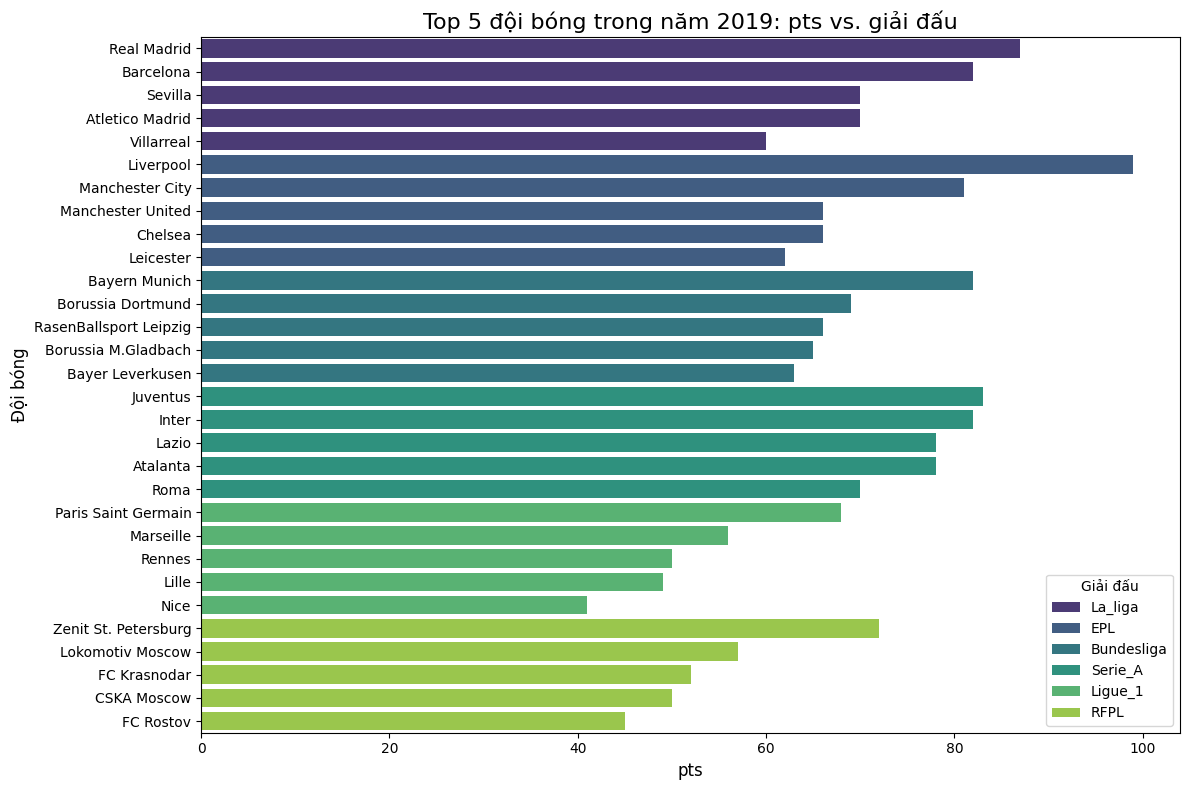

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_teams_latest_season,
    x='pts',
    y='team',
    hue='league',
    palette='viridis',
    dodge=False
)
plt.title(f"Top 5 đội bóng trong năm {latest_year}: pts vs. giải đấu", fontsize=16)
plt.xlabel("pts", fontsize=12)
plt.ylabel("Đội bóng", fontsize=12)
plt.legend(title='Giải đấu')
plt.tight_layout()
plt.show()


Để nhìn rõ được sự thể hiện của từng top 5, ta sẽ vẽ thêm scatter plot để thể hiện 'Performance' giữa các đội.

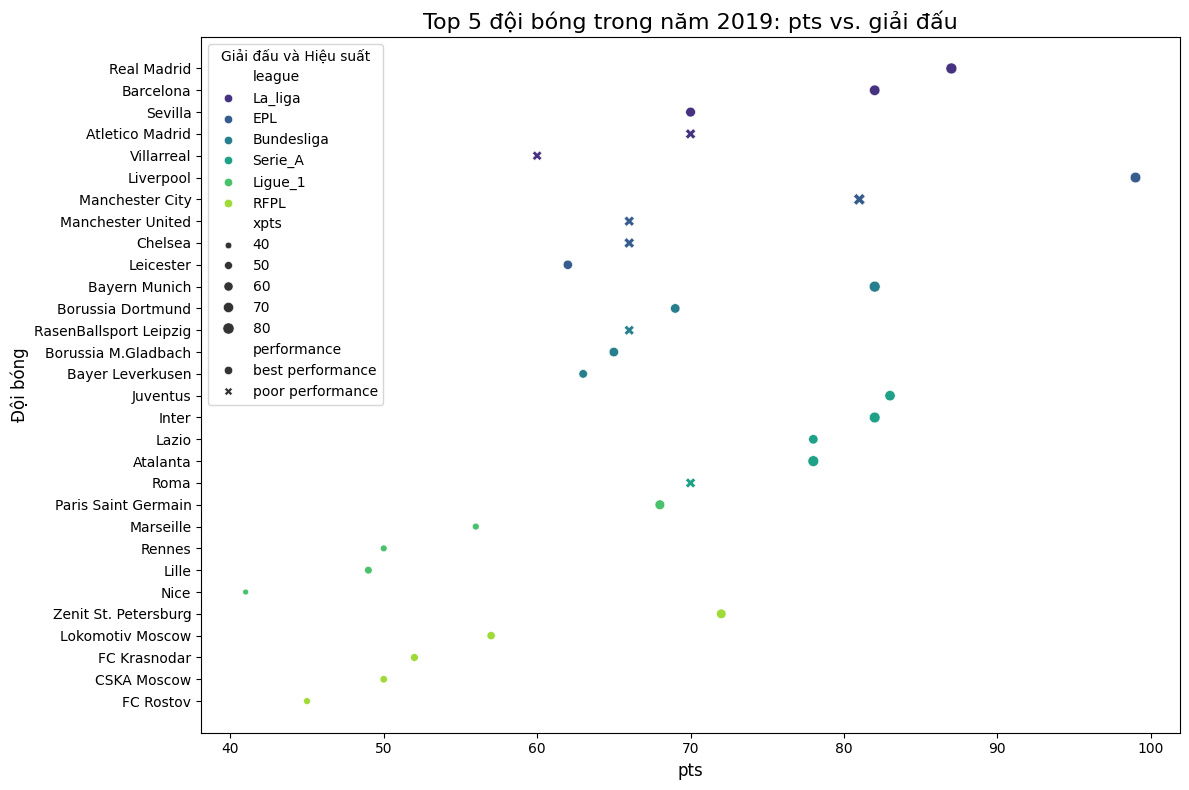

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=top_10_teams_latest_season,
    x='pts',
    y='team',
    hue='league',
    size='xpts',
    style='performance',
    palette='viridis',
    legend='brief'
)

plt.title(f"Top 5 đội bóng trong năm {latest_year}: pts vs. giải đấu", fontsize=16)
plt.xlabel("pts", fontsize=12)
plt.ylabel("Đội bóng", fontsize=12)
plt.legend(title='Giải đấu và Hiệu suất')
plt.tight_layout()
plt.show()

**Nhận xét**
1. Tương quan giữa rank và performance:
- Nhóm đội đứng đầu (vị trí 1): Phần lớn các đội ở vị trí đầu bảng (như Real Madrid, Bayern Munich, Juventus, Liverpool, Paris Saint Germain) đều có hiệu suất (performance) được đánh giá là best performance. Điều này chứng tỏ rằng việc duy trì hiệu suất tốt đóng vai trò lớn trong việc dẫn đầu bảng xếp hạng.
- Nhóm đội ở vị trí thấp hơn (2-5): Nhiều đội như Manchester City và Roma được đánh giá là poor performance, dù họ vẫn giữ vị trí cao trong bảng xếp hạng. Điều này cho thấy rằng ngoài hiệu suất, các yếu tố như điểm số, số trận thắng, hoặc đối thủ cạnh tranh cũng ảnh hưởng lớn đến thứ hạng.

2. Ảnh hưởng của performance đến thứ hạng cuối cùng:
- Hiệu suất tốt (best performance) không phải lúc nào cũng đảm bảo vị trí cao: Leicester và Bayer Leverkusen đều có best performance, nhưng chỉ xếp thứ 5 trong giải đấu của họ. Điều này cho thấy rằng mặc dù họ có thể thi đấu hiệu quả, số trận thắng hoặc số điểm không đủ để cạnh tranh với các đội mạnh hơn.
- Hiệu suất kém (poor performance) không ngăn cản đội đạt thứ hạng cao: Manchester City và Roma có hiệu suất được đánh giá là kém, nhưng vẫn đứng thứ 2 và 5, tương ứng. Điều này gợi ý rằng các yếu tố khác, như sự cạnh tranh yếu hơn từ các đội khác, có thể giúp họ giữ được vị trí cao.

**=> Tóm lại, hiệu suất (performance bao gồm pts và xpts (đặc biệt là số điểm được kì vọng - xpts)) có ảnh hưởng đến thứ hạng nhưng không quá sâu sắc, và đây không phải là yếu tố duy nhất quyết định thứ hạng, vì có thể thấy rõ các đội có hạng cao vẫn có hiệu suất thấp.**


### Câu 6: Số lượng performance được phân bố như thế nào? <a name="q6"></a>

**Ý nghĩa của câu hỏi**

Câu hỏi này giúp bạn tìm hiểu cách thức phân bổ performance (hiệu suất) của các đội bóng qua các mùa giải và giải đấu. Bằng cách phân tích sự phân bố này, bạn sẽ có cái nhìn sâu sắc về các đội bóng có xu hướng vượt kỳ vọng, các đội thi đấu kém hơn so với kỳ vọng và những đội bóng có phong độ ổn định.

**Lợi ích khi trả lời câu hỏi**

Câu hỏi này giúp bạn hiểu rõ hơn về sự thay đổi phong độ của các đội bóng qua từng mùa giải và trong các giải đấu khác nhau. Việc phân bố số lượng performance (best/poor) qua từng mùa hoặc giải đấu sẽ cho thấy liệu các đội bóng có xu hướng cải thiện, duy trì, hay giảm sút hiệu suất theo thời gian.

#### Qua từng mùa giải

In [47]:
performance_by_season = df_overview.groupby(['year', 'performance'])['team'].count().reset_index()
performance_by_season

year       performance  team
0   2014  best performance    54
1   2014  poor performance    60
2   2015  best performance    57
3   2015  poor performance    57
4   2016  best performance    59
5   2016  poor performance    55
6   2017  best performance    54
7   2017  poor performance    60
8   2018  best performance    55
9   2018  poor performance    59
10  2019  best performance    60
11  2019  poor performance    54

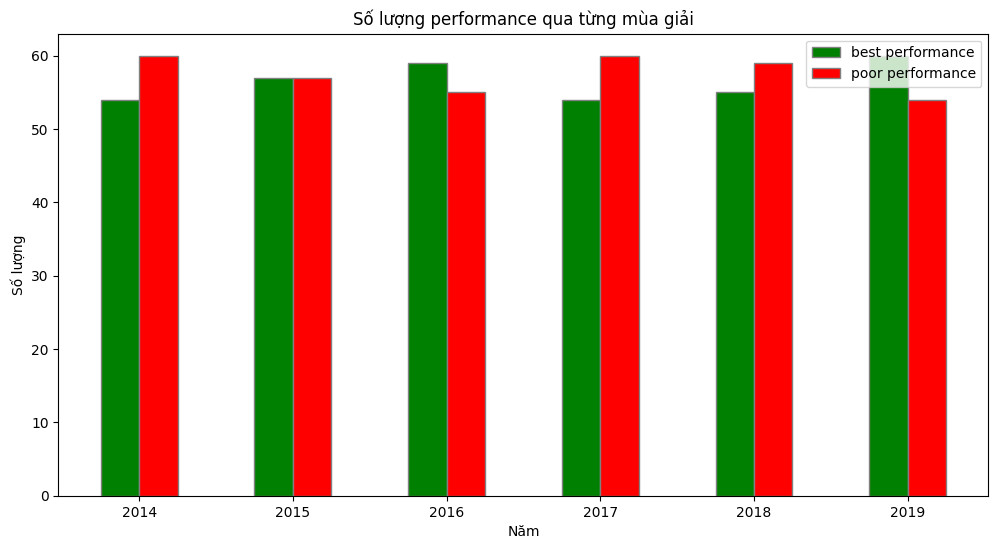

In [48]:
barWidth = 0.25
years = performance_by_season['year'].unique()
num_years = len(years)

r1 = np.arange(num_years)
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))

best_performance = performance_by_season[performance_by_season['performance'] == 'best performance'].groupby('year')['team'].sum().reindex(years, fill_value=0)
poor_performance = performance_by_season[performance_by_season['performance'] == 'poor performance'].groupby('year')['team'].sum().reindex(years, fill_value=0)

plt.bar(r1, best_performance, color='green', width=barWidth, edgecolor='grey', label='best performance')
plt.bar(r2, poor_performance, color='red', width=barWidth, edgecolor='grey', label='poor performance')

plt.title('Số lượng performance qua từng mùa giải')
plt.xlabel('Năm')
plt.ylabel('Số lượng')

plt.xticks([r + barWidth/2 for r in range(num_years)], years)
plt.legend()
plt.show()

**Nhận xét**
- Trong các mùa giải từ 2014 đến 2019, số lượng các trận được xếp vào nhóm "poor performance" (màu đỏ) luôn nhỉnh hơn hoặc ngang bằng số lượng trận thuộc nhóm "best performance" (màu xanh), trừ hai năm 2016 và 2019.
Mùa giải 2014 và 2017 có sự chênh lệch lớn nhất giữa hai loại performance, với "poor performance" vượt trội hơn đáng kể.
- Từ 2016 đến 2019, số lượng "best performance" tăng nhẹ, nhưng không rõ rệ

#### Qua từng giải đấu

In [49]:
performance_by_league = df_overview.groupby(['league', 'performance'])['team'].count().reset_index()
performance_by_league

league       performance  team
0   Bundesliga  best performance    54
1   Bundesliga  poor performance    54
2          EPL  best performance    52
3          EPL  poor performance    68
4      La_liga  best performance    57
5      La_liga  poor performance    63
6      Ligue_1  best performance    62
7      Ligue_1  poor performance    58
8         RFPL  best performance    48
9         RFPL  poor performance    48
10     Serie_A  best performance    66
11     Serie_A  poor performance    54

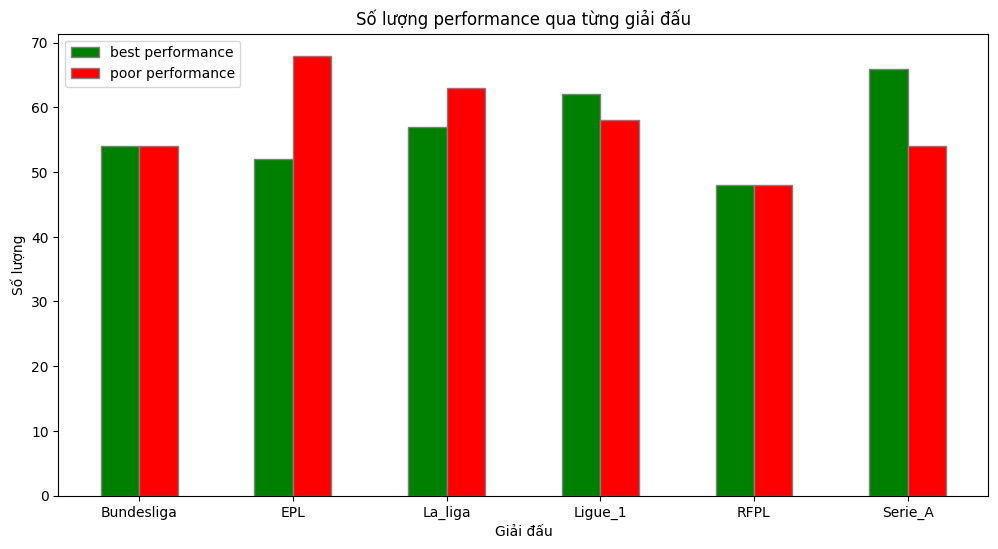

In [50]:
barWidth = 0.25
leagues = performance_by_league['league'].unique()

r1 = np.arange(len(leagues))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))

best_performance = performance_by_league[performance_by_league['performance'] == 'best performance'].groupby('league')['team'].sum().reindex(leagues, fill_value=0)
poor_performance = performance_by_league[performance_by_league['performance'] == 'poor performance'].groupby('league')['team'].sum().reindex(leagues, fill_value=0)

plt.bar(r1, best_performance, color='green', width=barWidth, edgecolor='grey', label='best performance')
plt.bar(r2, poor_performance, color='red', width=barWidth, edgecolor='grey', label='poor performance')

plt.title('Số lượng performance qua từng giải đấu')
plt.xlabel('Giải đấu')
plt.ylabel('Số lượng')

plt.xticks([r + barWidth/2 for r in range(len(leagues))], leagues)
plt.legend()
plt.show()


**Nhận xét**
- Bundesliga: Có số lượng performance xuất sắc và kém tương đối cân bằng.
- EPL: Giải đấu này có số lượng performance kém cao hơn so với các giải đấu khác, trong khi số lượng  performance cũng ở mức khá cao. Điều này có thể cho thấy tính cạnh tranh cao và sự biến động lớn trong kết quả các trận đấu.
- La Liga: Tương tự như Bundesliga, giải đấu này có số lượng performance xuất sắc và kém tương đối cân bằng và khá cao so với tổng thể.
- Ligue 1: Giải đấu này có số lượng performance xuất sắc cao hơn so với kém, tuy nhiên chênh lệch không nhiều
- RFPL: Giải đấu này có số lượng  performance xuất sắc và kém thấp hơn so với các giải đấu lớn khác. Điều này có thể do nhiều yếu tố như chất lượng đội bóng, sự đầu tư, hoặc tiêu chí đánh giá performance khác nhau.
- Serie A: Giải đấu này có số lượng  performance xuất sắc nhất, chênh lệch với performance kém cũng rất rõ rệt

### Câu 7: Những chỉ số `xG`, `xGA`, `npxG`, `npxGA` và `xpts` có tương quan thế nào với kết quả trận đấu (thắng, hòa, thua)? <a name="q7"></a>

**Ý nghĩa của câu hỏi**

Nhằm tìm hiểu mối liên hệ giữa các chỉ số với kết quả trận đấu (thắng, hòa, thua), ta sẽ tìm hiểu hiệu số kỳ vọng bàn thắng (xG - xGA) để dự đoán kết quả của trận đấu một cách chính xác hay không, ta sẽ đặt ra 3 câu hỏi nhỏ như sau:

- Hệ số xG - xGA > 0: Nếu một đội có số bàn thắng kỳ vọng cao hơn số bàn thua kỳ vọng, điều này đồng nghĩa với khả năng cao đội đó sẽ thắng trận hay không?
- Hệ số xG - xGA ≈ 0: Với các trận đấu mà hiệu số kỳ vọng gần bằng 0, liệu điều này có dẫn đến kết quả hòa không?
- Hệ số xG - xGA < 0: Liệu việc để đối thủ tạo ra nhiều cơ hội nguy hiểm hơn (xGA cao) có luôn dẫn đến thất bại không?

Sau khi trả lời được các câu hỏi trên, ta sẽ làm rõ được một số vấn đề như:
- **Hiểu rõ hơn về chiến thuật và hiệu quả thi đấu:** Một đội có thể tạo ra nhiều cơ hội (xG cao) nhưng vẫn không thắng trận. Điều này phản ánh vấn đề về hiệu quả dứt điểm, chiến thuật, hoặc khả năng phòng ngự yếu kém (xGA cao). Ngược lại, nếu một đội có xG thấp nhưng vẫn thường thắng, điều này có thể phản ánh lối chơi thực dụng, tối ưu hóa cơ hội ít ỏi.
- **Thay người trong trận đúng đắn:** Huấn luyện viên có thể sử dụng thông tin này để điều chỉnh chiến thuật, cải thiện khâu tấn công (tăng xG) hoặc phòng ngự (giảm xGA) nhằm tăng khả năng giành chiến thắng.

#### Trực quan bằng boxplot với xGA

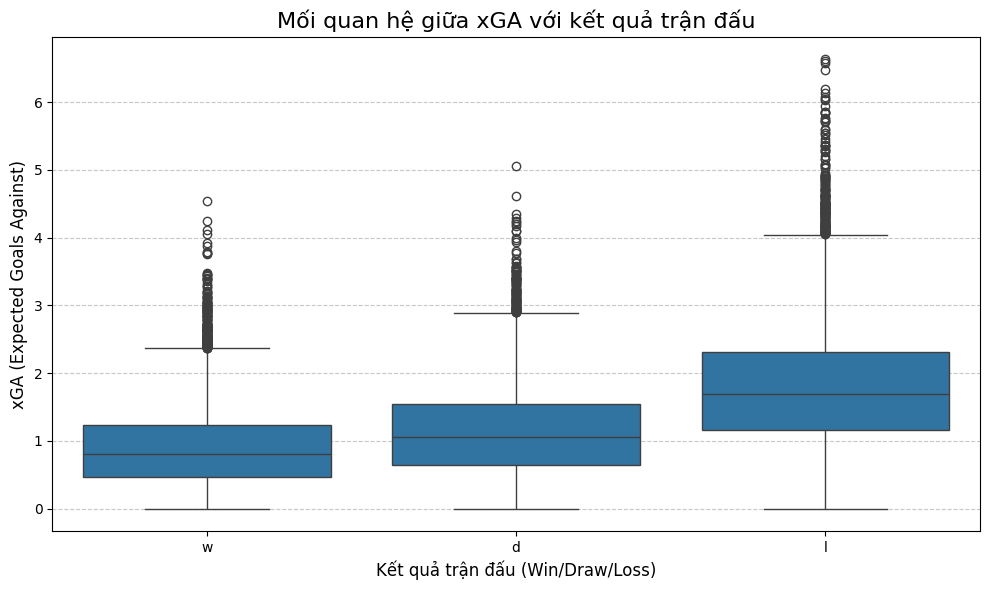

result
d    1.159281
l    1.805460
w    0.915448
Name: xGA, dtype: float64

In [51]:
xga_correlation_summary = df_details.groupby("result")["xGA"].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_details, x="result", y="xGA", legend = False)
plt.title("Mối quan hệ giữa xGA với kết quả trận đấu", fontsize=16)
plt.xlabel("Kết quả trận đấu (Win/Draw/Loss)", fontsize=12)
plt.ylabel("xGA (Expected Goals Against)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

xga_correlation_summary

#### Trực quan bằng boxplot với xG

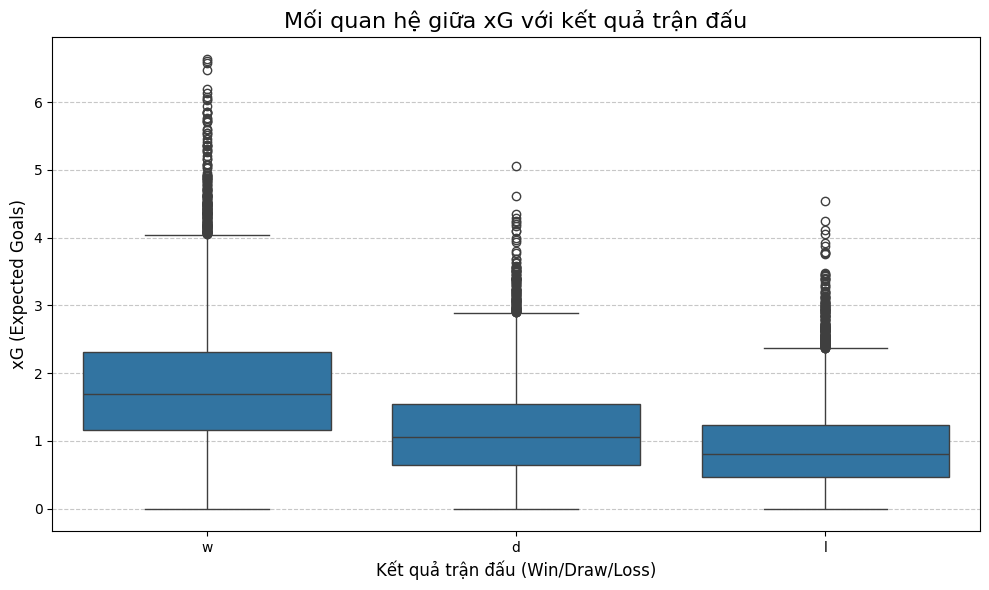

result
d    1.159281
l    0.915448
w    1.805460
Name: xG, dtype: float64

In [52]:
xg_correlation_summary = df_details.groupby("result")["xG"].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_details, x="result", y="xG", legend = False)
plt.title("Mối quan hệ giữa xG với kết quả trận đấu", fontsize=16)
plt.xlabel("Kết quả trận đấu (Win/Draw/Loss)", fontsize=12)
plt.ylabel("xG (Expected Goals)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

xg_correlation_summary


**Nhận xét**

1. Đối với xGA và kết quả trận đấu:
- Trận thua (l): Trung bình xGA cao nhất (1.805), cho thấy các đội thua thường để đối phương tạo ra nhiều cơ hội ghi bàn hơn kỳ vọng.
- Trận hòa (d): Trung bình xGA trung bình (1.159), gần như cân bằng. Điều này phản ánh cả hai đội có khả năng phòng ngự tương đương hoặc trận đấu có ít cơ hội ghi bàn rõ ràng.
- Trận thắng (w): Trung bình xGA thấp nhất (0.915), cho thấy các đội thắng thường kiểm soát tốt và giảm thiểu cơ hội ghi bàn của đối thủ.

2. Đối với xG và kết quả trận đấu:
- Trận thắng (w): Trung bình xG cao nhất (1.805), cho thấy các đội thắng thường tạo ra nhiều cơ hội ghi bàn rõ ràng hơn.
- Trận hòa (d): Trung bình xG ở mức trung bình (1.159), cho thấy hai đội có cơ hội tương đương và không thể chuyển hóa thành lợi thế cụ thể.
- Trận thua (l): Trung bình xG thấp nhất (0.915), cho thấy các đội thua thường tạo ra ít cơ hội ghi bàn rõ ràng hơn.


**Tương quan giữa xG và kết quả trận đấu:** Chỉ số xG có mối quan hệ thuận chiều với kết quả trận đấu. Khi xG cao, cơ hội thắng trận lớn hơn do đội bóng tạo ra nhiều cơ hội rõ ràng. Ngược lại, xG thấp dẫn đến khả năng thất bại cao hơn do đội tạo ra ít cơ hội hơn. Thường các đội bóng nhỏ khi gặp các đội bóng lớn sẽ tiếp cận trận đấu bằng cách thận trọng và sử dụng chiến thuật phòng ngự - phản công. Ở những chiến thuật này, hàng phòng ngự sẽ phải chịu áp lực lớn và hàng công sẽ không có nhiều bóng để triển khai tấn công khiến xG thấp. Tuy vậy, đây là chiến thuật tốt nhất cho các đội bóng nhỏ khi họ giảm chỉ số xGA hết mức có thể nhằm tăng cơ hội giành chiến thắng.

**Tương quan giữa xGA và kết quả trận đấu:** Chỉ số xGA có mối quan hệ ngược chiều với kết quả trận đấu. Khi xGA thấp, khả năng thắng trận cao hơn vì đội bóng kiểm soát và hạn chế cơ hội của đối phương. Ngược lại, xGA cao phản ánh sự yếu kém trong phòng ngự, dẫn đến thất bại.

Dựa trên lập luận, ta có thể trả lời những câu hỏi nhỏ phía trên như sau:

- Hệ số xG - xGA > 0: Nếu đội giành chiến thắng với hiệu số này thì phản ánh rằng đội đang chơi tốt khi hàng công tận dụng được cơ hội và hàng thủ có nhiều pha bóng phòng ngự thành công, giúp đội tạo cách biệt so với đối thủ nhàm chiến thắng trận đấu. Nếu đội không giành chién thắng với hiệu số này (hòa - thua), chứng tỏ hàng công đã phung phí nhiều cơ hội và có vấn đề về khả năng dứt điểm.
- Hệ số xG - xGA ≈ 0:  Nếu đội giành chiến thắng với hiệu số này thì phản ánh đội đã có nhiều pha dứt điểm may mắn thành bàn (những cú sút xa ngoài vòng cấm hoặc dứt điểm ở những góc khó sẽ tạo xG thấp hơn), ngoài ra cũng phản ánh hàng phòng ngự chơi không tập trung và để đối thủ tạo ra nhiều cơ hội hơn trên phần sân nhà, giảm cơ hội triển khai tấn công cho hàng công. Với hiệu số như này, ta thường thấy đây là cách tiếp cận của các đội bóng nhỏ, có nhân sự thua nhiều về trình độ so với đội đối thủ. Nếu đội không giành chiến thắng với hiệu số này (hòa - thua), điều này là do đội đã không tận dụng tốt các cơ hội tấn công hoặc ít có cơ hội tấn công trong trận đấu.
- Hệ số xG - xGA < 0: Thường với hiệu số này, đội sẽ không thể giành chiến thắng khi cả hàng công và hàng phòng ngự đều chơi tệ - hàng công ít tạo ra cơ hội nguy hiểm và hàng phòng ngự để đối thủ gây áp lực quá lớn lên khung thành sân nhà.


Correlation Matrix:
             xG       xGA      npxG     npxGA      xpts     npxGD
xG     1.000000 -0.212319  0.937556 -0.213991  0.775654  0.739922
xGA   -0.212319  1.000000 -0.213991  0.937556 -0.718463 -0.739922
npxG   0.937556 -0.213991  1.000000 -0.211048  0.732459  0.778154
npxGA -0.213991  0.937556 -0.211048  1.000000 -0.678730 -0.778154
xpts   0.775654 -0.718463  0.732459 -0.678730  1.000000  0.906754
npxGD  0.739922 -0.739922  0.778154 -0.778154  0.906754  1.000000


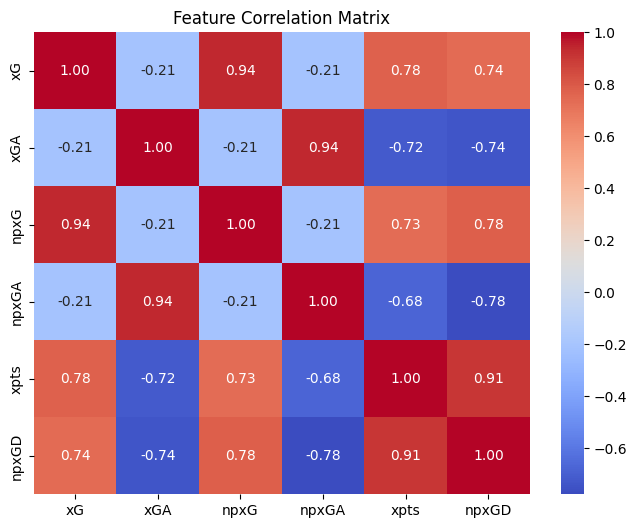


Variance Inflation Factor (VIF):
  Feature        VIF
0      xG  34.976340
1     xGA  28.923431
2    npxG        inf
3   npxGA        inf
4    xpts   9.324044
5   npxGD        inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['xG', 'xGA', 'npxG', 'npxGA', 'xpts', 'npxGD']
X = merged_data[features]

correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Ta có thể thấy, xG và xGA có tương quan sâu sắc với nhau và có thể sử dùng để dự đoán kết quả trận đấu. Tuy vậy, ta vẫn có thể cải thiện độ tốt của mô hình qua việc bổ sung các tính chất khác như `npxG`, `npxGA`, `npxGD` và `xpts` do VIF của các tính chất này đều lớn hơn 5, thể hiện mối tương quan giữa các biến độc lập cao. Ngoài ra, ta cũng có thể giải thích được lý do các biến này có tương quan cao với nhau như sau:
- `npxG` và `npxGA` thể hiện chất lượng của cú dứt điểm không bao gồm các quả phạt đền vào lưới ở cả hai đội bóng. Các quả phạt đền là yếu tố không thể thiếu trong một trận đấu và nhiều trường hợp một trận đấu được định đoạt thắng thua bằng những quả phạt đền này. Việc cân nhắc hai chỉ số này có thể cho ta góc nhìn khách quan hơn về chất lượng của những cú dứt điểm của cả hai đội. Từ đó, ta có thể thấy, nếu hai đặc trưng này làm tham số của mô hình sẽ cải thiện được tính khách quan và khả năng dự đoán của mô hình.
- `xpts` là đặc trưng thể hiện số điểm kì vọng của trận đấu đó, một trận đấu có thể bao gồm nhiều sự kiện có thể định đoạt kết quả của trận đấu như các quyết định của trọng tài, các tình huống cố định, các chiến lược thay người, ... và mỗi quyết định đều sẽ ảnh hưởng đến kết quả chung của đội bóng, nếu quyết định tạo lợi thế cho đội bóng, chỉ số này sẽ tăng lên thể hiện mức độ xứng đáng đối với kết quả trận đấu. Việc thêm đặc trưng này vào mô hình sẽ đưa ra dự đoán chính xác hơn về kết quả trận đấu.
- `npxGD` là đặc trưng thể hiện hiệu số bàn thắng cách biệt không bao gồm các quả phạt đền, thông số này cũng đại diện mức độ hấp dẫn của trận đấu và có thể ảnh hưởng đến kết quả chung của trận đấu.

Chính vì thế, ta sẽ xây dựng mô hình với các bước như sau:
1. **Chuẩn bị dữ liệu:** Xác định các đặc trưng (`xG`, `xGA`, `npxG`, `npxGA`, `npxGD`, `xpts`) và biến mục tiêu (`result`), mã hóa biến mục tiêu từ chuỗi thành số nguyên bằng `LabelEncoder`, sau đó chia dữ liệu thành tập huấn luyện (70%) và kiểm tra (30%) bằng `train_test_split` với `stratify=y` để đảm bảo rằng tỉ lệ các lớp (categories) trong tập dữ liệu gốc được duy trì tương ứng trong cả tập huấn luyện và tập kiểm tra.

2. **Xây dựng mô hình cơ sở:** Tạo hai mô hình cơ sở là `DecisionTreeClassifier` với các tham số như `max_depth=8`, `min_samples_split=10`, `min_samples_leaf=5`, và `class_weight='balanced'` và `GradientBoostingClassifier` với `n_estimators=500`, `learning_rate=0.1`, và `max_depth=5`.

3. **Xây dựng mô hình meta:** Sử dụng `LogisticRegression` làm mô hình meta, thiết lập tham số `max_iter=1000` để đảm bảo hội tụ khi huấn luyện.

4. **Tạo Stacking Classifier:** Kết hợp các mô hình cơ sở (`Decision Tree` và `Gradient Boosting`) bằng `StackingClassifier`, sử dụng `Logistic Regression` làm meta-model, và áp dụng `Cross-Validation` với `cv=5` để tránh mô hình bị overfitting

5. **Huấn luyện mô hình:** Huấn luyện `StackingClassifier` trên tập huấn luyện bằng hàm `fit`.

6. **Đánh giá mô hình:** Tính điểm `Cross-Validation Accuracy` bằng `cross_val_score` và sử dụng tập kiểm tra để tính các chỉ số như Accuracy, Classification Report, Mean Absolute Error (MAE).

7. **Dự đoán và hiển thị kết quả:** Dự đoán kết quả trên tập kiểm tra, giải mã nhãn số thành giá trị ban đầu (w - 0, d - 1, l - 2) bằng `LabelEncoder`.`inverse_transform`, sau đó in các chỉ số đánh giá và so sánh nhãn dự đoán với nhãn thực tế.

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

features = ['xG', 'xGA', 'npxG', 'npxGA', 'npxGD', 'xpts']
target = 'result'

label_encoder = LabelEncoder()
merged_data[target] = label_encoder.fit_transform(merged_data[target])

X = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

decision_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5
)

gradient_boosting = GradientBoostingClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)

meta_model = LogisticRegression(random_state=42, max_iter=500)

stacking_model = StackingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('gradient_boosting', gradient_boosting)
    ],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train, y_train)

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Cross-Validation Accuracy: {mean_cv_score:.4f}")
print("\nClassification Report:")
print(classification_rep)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

print("\nSample Predictions:")
print(f"True Labels (Decoded): {y_test_decoded[:10]}")
print(f"Predicted Labels (Decoded): {y_pred_decoded[:10]}")

Model Evaluation Results:
Accuracy: 0.6044
Cross-Validation Accuracy: 0.6048

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.13      0.20      1860
           1       0.62      0.76      0.68      2757
           2       0.62      0.77      0.68      2757

    accuracy                           0.60      7374
   macro avg       0.56      0.55      0.52      7374
weighted avg       0.57      0.60      0.56      7374


Mean Absolute Error (MAE): 0.5286

Sample Predictions:
True Labels (Decoded): [0 2 1 2 1 2 0 0 2 2]
Predicted Labels (Decoded): [1 2 1 2 1 1 1 1 2 2]


Ta có thể thấy độ lỗi MAE rơi vào khoảng 52%, chứng tỏ kết quả dự đoán còn chưa chính xác mặc dù đã áp dụng nhiều phương pháp để cải thiện độ chính xác của mô hình như [Stacking Classifier](https://sharmasaravanan.medium.com/understanding-stacking-classifiers-a-comprehensive-guide-195bfab58e48) và chống overfitting như **Cross validation**. Một lý do có thể đưa ra là do lượng dữ liệu có sẵn chưa đủ tốt để cải thiện độ chính xác của mô hình.

### Câu 8: Có sự khác biệt đáng kể nào về hiệu suất (xG, xGA, pts) giữa các trận sân nhà và sân khách không? <a name="q8"></a>


**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm khám phá sự khác biệt về hiệu suất của các đội bóng khi thi đấu trên sân nhà và sân khách, thông qua các chỉ số quan trọng như:

- xG: Đo lường khả năng tấn công và chất lượng của cú dứt điểm, chỉ ra xem đội có tạo ra nhiều cơ hội hơn trên sân nhà hay sân khách không.
- xGA: Đánh giá khả năng phòng ngự của đội dựa trên chất lượng của những cú dứt điểm từ đối thủ, liệu đội có để đối phương tạo ra nhiều cơ hội hơn trên sân khách hay không.
- pts (Points): Điểm số thực tế đạt được, phản ánh kết quả cụ thể của các trận đấu (thắng, hòa, thua).

**Lợi ích khi trả lời câu hỏi**
- **Hiểu rõ lợi thế sân nhà (Home Advantage):** Nếu xG và pts cao hơn trên sân nhà thì điều này cho thấy lợi thế sân nhà giúp đội bóng tấn công hiệu quả và đạt kết quả tốt hơn. Nếu xGA thấp hơn trên sân nhà thể hiện đội phòng ngự tốt hơn khi có sự hỗ trợ của khán giả và quen thuộc với điều kiện sân đấu.
- **Phân tích hiệu suất sân khách:** Nếu hiệu suất trên sân khách (xG, xGA, pts) thấp thì đội có thể cần điều chỉnh chiến thuật để cải thiện khả năng thi đấu ở sân khách. Nếu hiệu suất trên sân khách không giảm nhiều so với sân nhà thì đội bóng có sự ổn định và linh hoạt khi thi đấu trong các môi trường khác nhau.
- **Cải thiện chiến thuật:** Phát hiện những vấn đề cụ thể khi đội thi đấu trên sân khách (ví dụ: tạo ít cơ hội hoặc phòng ngự kém), từ đó đưa ra những giải pháp cụ thể trong từng trạng thái của trận đấu.
- **Khắc phục các yếu tố ngoài chuyên môn:** Tăng cường các yếu tố giúp đội phát huy lợi thế sân nhà, như tận dụng sự cổ vũ của khán giả, cải thiện các khía cạnh như hậu cần (di chuyển, nghỉ ngơi) và tâm lý cầu thủ.

#### Trực quan hóa các chỉ số dựa trên sân nhà và sân khách

In [66]:
home_away_df_details = df_details[["h_a", "xG", "xGA", "pts", "team"]].dropna()
home_away_df_details["location"] = home_away_df_details["h_a"].map({"h": "Sân nhà", "a": "Sân khách"})

avg_stats_by_location = home_away_df_details.groupby("location")[["xG", "xGA", "pts"]].mean()
avg_stats_by_location.columns = ["Trung bình xG", "Trung bình xGA", "Trung bình Points"]
avg_stats_by_location

Trung bình xG  Trung bình xGA  Trung bình Points
location                                                   
Sân khách       1.138014        1.481374           1.145484
Sân nhà         1.481374        1.138014           1.602197

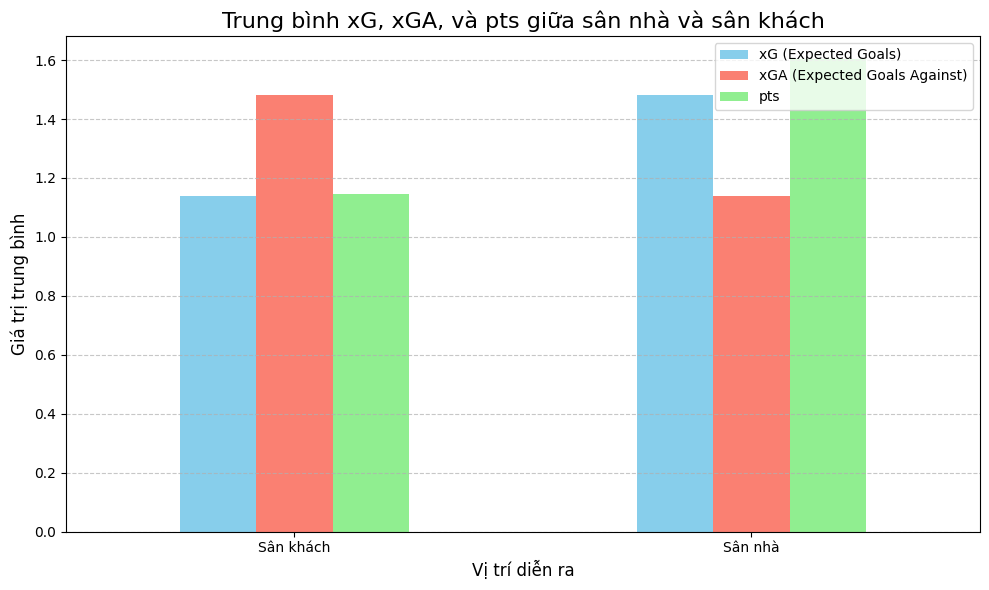

In [67]:
avg_stats_by_location.plot(kind="bar", figsize=(10, 6), color=["skyblue", "salmon", "lightgreen"])
plt.title("Trung bình xG, xGA, và pts giữa sân nhà và sân khách", fontsize=16)
plt.ylabel("Giá trị trung bình", fontsize=12)
plt.xlabel("Vị trí diễn ra", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(["xG (Expected Goals)", "xGA (Expected Goals Against)", "pts"], fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**

Biểu đồ trên cho thấy lợi thế sân nhà đóng vai trò quan trọng trong bóng đá. Các đội bóng thường có xu hướng thi đấu tốt hơn, giành được nhiều điểm số hơn khi được chơi trên sân nhà. Để tận dụng tối đa lợi thế này, các đội bóng cần có sự chuẩn bị kỹ lưỡng, xây dựng lối chơi phù hợp và tạo ra một bầu không khí thi đấu sôi động trên sân nhà.

#### Trực quan hiệu suất của từng đội theo từng trận sân nhà và sân khách

In [68]:
home_away_performance = df_details.groupby(['team', 'h_a', 'league'])[['xG', 'xGA', 'pts']].mean().reset_index()

Trong các giải đấu Châu Âu, Ngoại Hạng Anh (EPL) nổi tiếng là giải đấu có nhiều trận derby hấp dẫn với cổ động viên cuồng nhiệt nhất, trong đó nhiều đội bóng sở hữu sân đấu có sức chứa 50.000 - 60.000 chỗ ngồi. Chính vì thế, để làm rõ được yếu tố sân khách và sân nhà ảnh hưởng đến phong độ và kết quả trận đấu, nhóm sẽ chọn trực quan hóa giải đấu EPL và nhận xét.

#### xG trung bình giữa sân nhà và sân khách

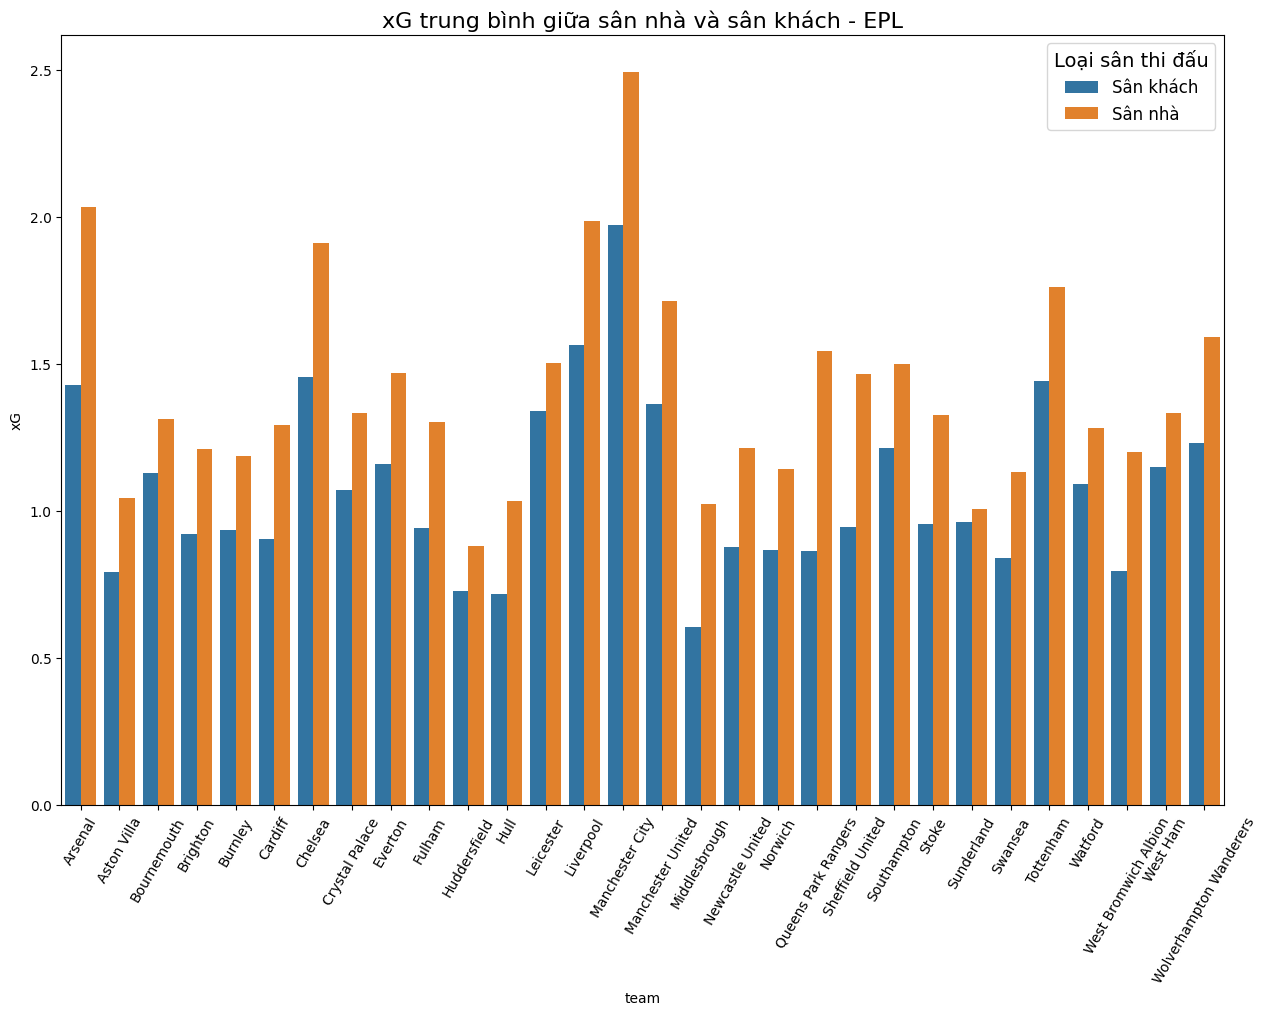

In [69]:
epl_matches = home_away_performance[home_away_performance['league'] == 'EPL']

plt.figure(figsize=(15, 10))
barplot = sns.barplot(x='team', y='xG', hue='h_a', data=epl_matches)
plt.title('xG trung bình giữa sân nhà và sân khách - EPL', fontsize=16)

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Sân khách', 'Sân nhà'], title='Loại sân thi đấu', fontsize=12, title_fontsize=14)

plt.xticks(rotation=60, fontsize=10)

plt.show()

#### xGA trung bình giữa sân nhà và sân khách

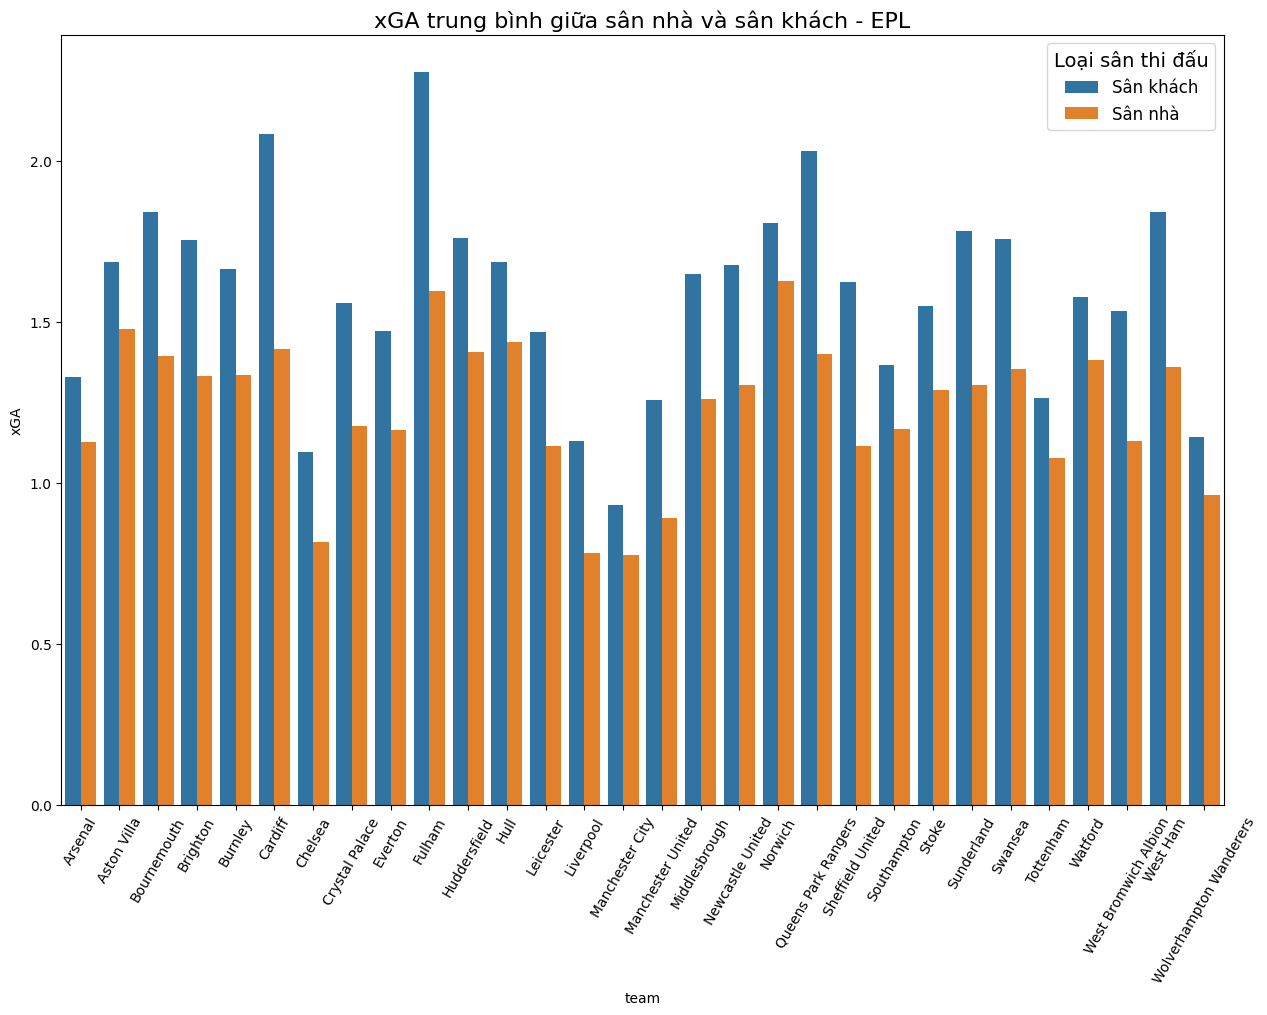

In [70]:
plt.figure(figsize=(15, 10))
barplot = sns.barplot(x='team', y='xGA', hue='h_a', data=epl_matches)
plt.title('xGA trung bình giữa sân nhà và sân khách - EPL', fontsize=16)

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Sân khách', 'Sân nhà'], title='Loại sân thi đấu', fontsize=12, title_fontsize=14)

plt.xticks(rotation=60, fontsize=10)

plt.show()

#### Điểm trung bình giữa sân nhà và sân khách

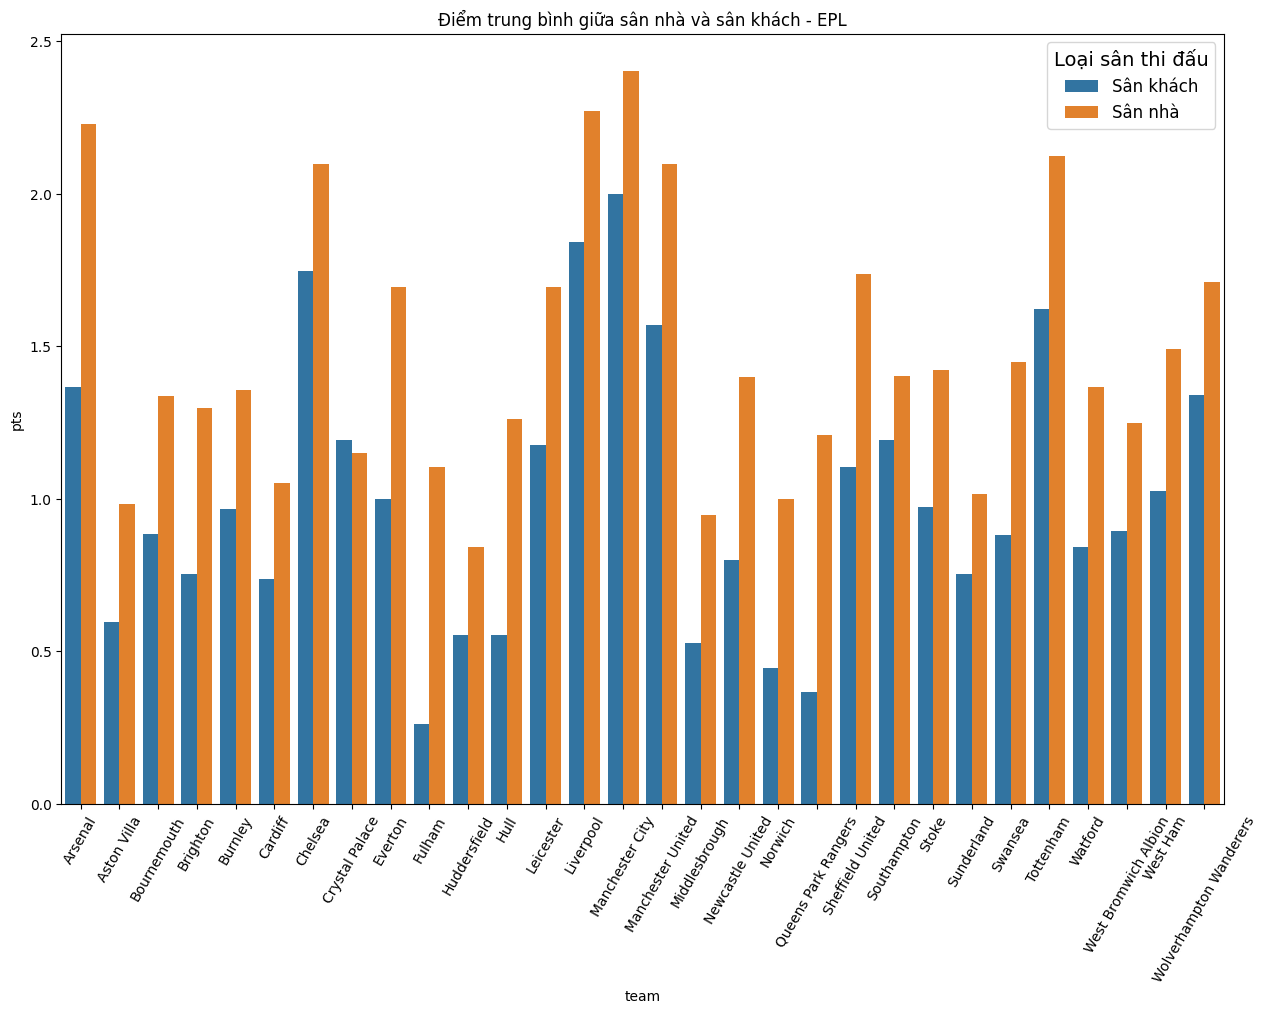

In [71]:
plt.figure(figsize=(15, 10))
sns.barplot(x='team', y='pts', hue='h_a', data=epl_matches)
plt.title('Điểm trung bình giữa sân nhà và sân khách - EPL')

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Sân khách', 'Sân nhà'], title='Loại sân thi đấu', fontsize=12, title_fontsize=14)

plt.xticks(rotation=60, fontsize=10)
plt.show()

**Kết luận:** Thống kê chỉ ra cả hai chỉ số `xG` và `xGA` đều cho thấy lợi thế sân nhà vô cùng lớn, trong đó nổi bật nhất là hai đội Liverpool và Manchester City tận dụng ưu thế này một cách tối ưu để thường xuyên góp mặt trong top 4 của giải đấu. Thậm chí Liverpool đã duy trì mạch bất bại tại sân nhà cho đến [T1/2022, Liverpool bất ngờ mất chuỗi bất bại bởi đội Burnley](https://www.boomplay.com/buzz/1771845).

### Câu 9: Các chỉ số `PPDA` có tương quan như thế nào với kết quả trận đấu? <a name="q9"></a>

**Ý nghĩa của câu hỏi**

Câu hỏi này nhằm khám phá mối quan hệ giữa các chỉ số `PPDA_coef`, `OPPDA_coef` và kết quả trận đấu (thắng, hòa, thua). Các chỉ số này đo lường các yếu tố quan trọng trong chiến thuật phòng ngự và tấn công của đội bóng

**Lợi ích khi trả lời câu hỏi**

- Bằng việc phân tích các chỉ số này, bạn có thể hiểu rõ hơn về cách các đội bóng thực hiện chiến thuật tấn công và phòng ngự trong trận đấu và liệu những chiến thuật này có ảnh hưởng tích cực hay tiêu cực đến kết quả trận đấu (thắng, hòa, thua).

- Ngoài ra, các chỉ số như `ppda_def`, `oppda_def` cho thấy khả năng phòng ngự của đội, trong khi `ppda_att` và `oppda_att` cho thấy khả năng tấn công. Hiểu được mối quan hệ giữa các chỉ số này và kết quả trận đấu có thể giúp đánh giá khả năng thi đấu tổng thể của đội bóng, cả khi phòng ngự và tấn công.

#### Thống kê các chỉ số `ppda_att` và `ppda_def` theo kết quả thắng - hoà - thua

Ta sẽ thống kê các chỉ số `ppda_att` và `ppda_def` tại giải Ngoại Hạng Anh, giải đấu nổi tiếng với nhịp độ trận đấu cao và nhiều đội bóng triển khai chiến thuật gây áp lực khác nhau. Từ đó, ta sẽ đưa ra cái nhìn tổng quan về các chỉ số này, phản ánh xu hướng của các đội tại giải đấu.

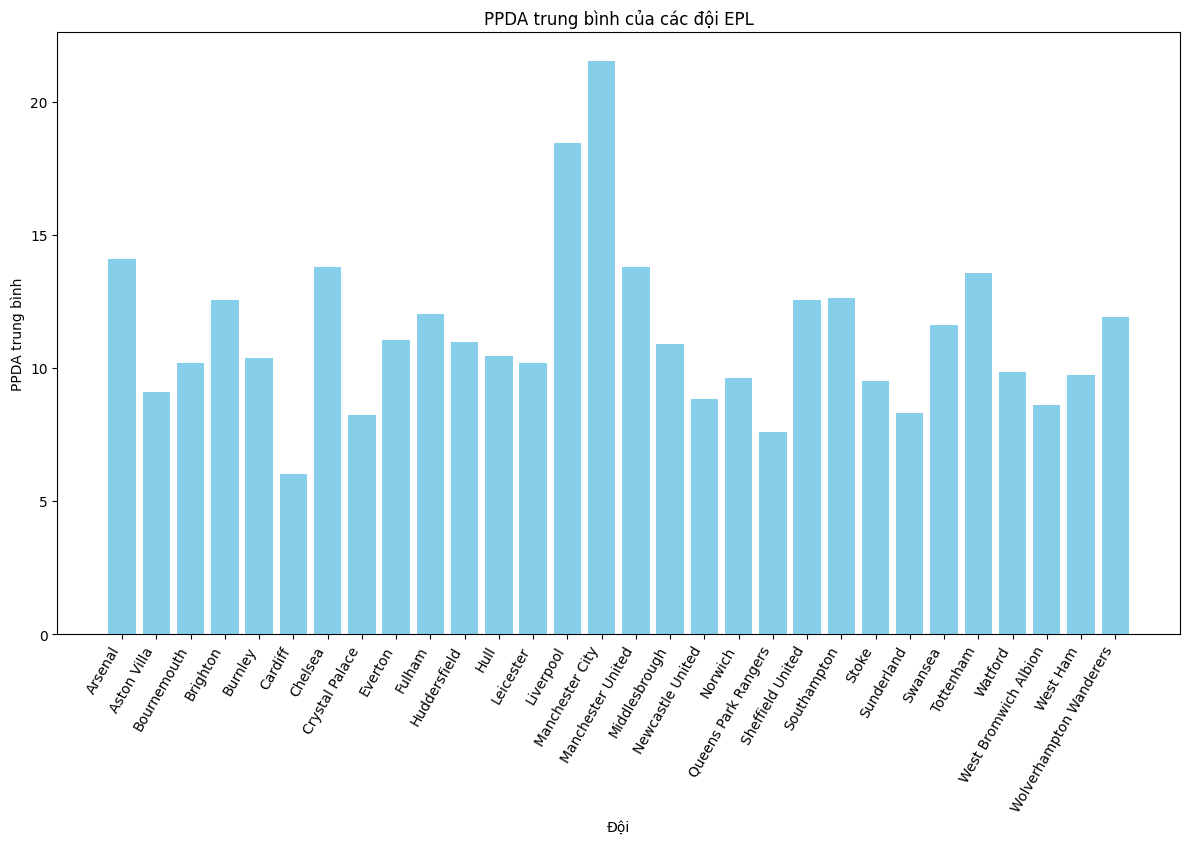

In [72]:
epl_matches = df_details[df_details['league'] == 'EPL']
average_ppda_att = epl_matches.groupby('team')['oppda_coef'].mean()

plt.figure(figsize=(12,8))  # Increase figure size for readability
plt.bar(average_ppda_att.index, average_ppda_att, color='skyblue')
plt.xlabel('Đội')
plt.ylabel('PPDA trung bình')
plt.title('PPDA trung bình của các đội EPL')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom space to prevent label clipping
plt.show()



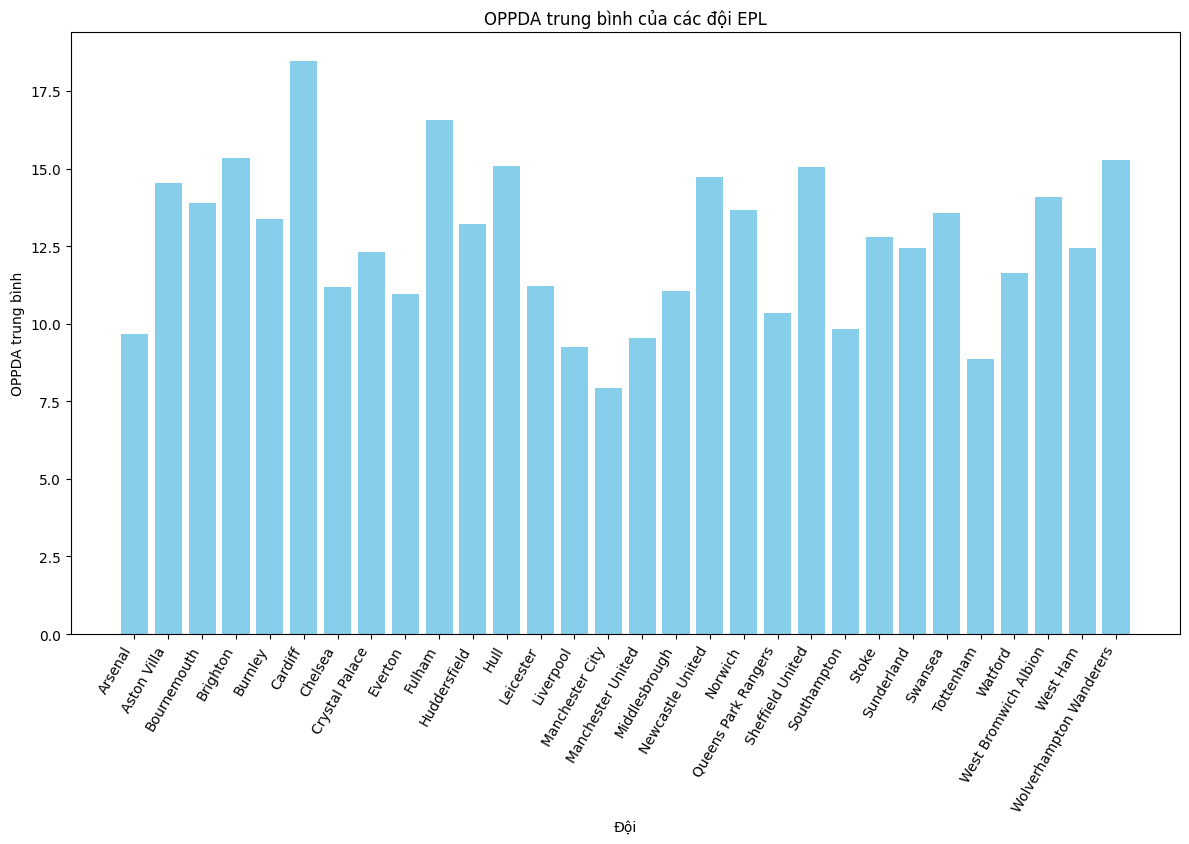

In [73]:
epl_matches = df_details[df_details['league'] == 'EPL']
average_ppda_att = epl_matches.groupby('team')['ppda_coef'].mean()

plt.figure(figsize=(12,8))
plt.bar(average_ppda_att.index, average_ppda_att, color='skyblue')
plt.xlabel('Đội')
plt.ylabel('OPPDA trung bình')
plt.title('OPPDA trung bình của các đội EPL')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

#### Trực quan hoá các chỉ số

<ipython-input-74-f3f50cdd7a8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_matches.loc[:, 'win'] = epl_matches['result'] == 'w'
<ipython-input-74-f3f50cdd7a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_matches.loc[:, 'draw'] = epl_matches['result'] == 'd'
<ipython-input-74-f3f50cdd7a8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

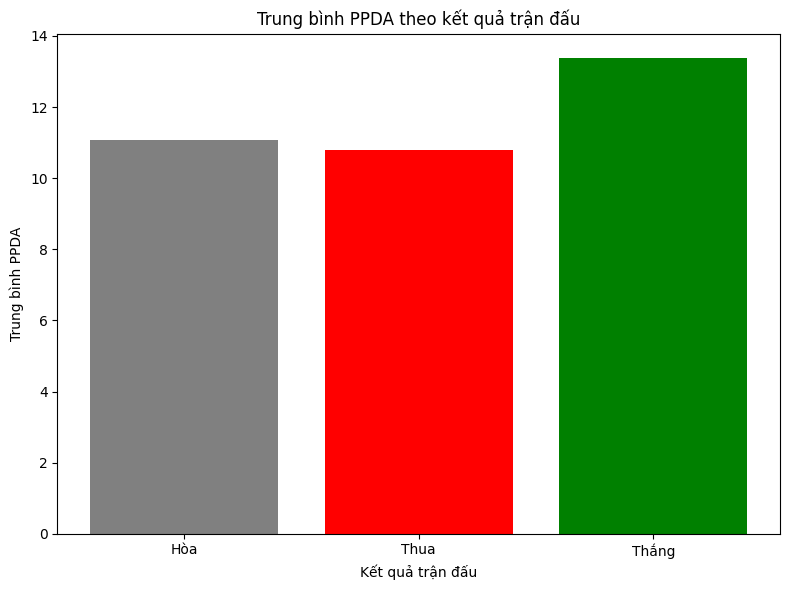

In [74]:
epl_matches.loc[:, 'win'] = epl_matches['result'] == 'w'
epl_matches.loc[:, 'draw'] = epl_matches['result'] == 'd'
epl_matches.loc[:, 'loss'] = epl_matches['result'] == 'l'

epl_matches.loc[epl_matches['result'] == 'w', 'result'] = 'Thắng'
epl_matches.loc[epl_matches['result'] == 'l', 'result'] = 'Thua'
epl_matches.loc[epl_matches['result'] == 'd', 'result'] = 'Hòa'

avg_ppda_by_result = epl_matches.groupby('result')['oppda_coef'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(avg_ppda_by_result['result'], avg_ppda_by_result['oppda_coef'], color=['gray', 'red', 'green'])

plt.xlabel('Kết quả trận đấu')
plt.ylabel('Trung bình PPDA')
plt.title('Trung bình PPDA theo kết quả trận đấu')
plt.tight_layout()

plt.show()


**Nhận xét:**
- Ta có thể thấy các đội bóng thuộc nhóm Big Six: Arsenal, Liverpool, Manchester City, Tottenham, Chelsea và Manchester United đều có thông số PPDA khác biệt so với cả giải đấu, chứng tỏ sức tấn công của các đội bóng này vẫn được duy trì qua hằng năm và thuộc top đầu của giải.
- Tuy các đội bóng thuộc nhóm Big Six có sức tấn công khác biệt so với các đối thủ khác nhưng để vô địch giải đấu, các đội cần có hàng phòng ngữ chắc chắn để tránh những trận thua đáng tiếc trước các đối thủ yếu hơn. Nhìn vào biểu đồ `OPPDA`, ta dễ dàng thấy các đội Chelsea, Tottenham, Arsenal, Manchester United đều không có hàng phòng ngự chắc chắn bằng `Liverpool` và `Manchester City`. Điều này bởi vì triết lý bóng đá của `Liverpool` và `Manchester City` đều khác biệt hoàn toàn so với 4 đội còn lại thuộc nhóm Big Six.
- Liverpool: đội bóng đặt triết lý Gegenpressing lên hàng đầu. Trong trận đấu, Liverpool thường xuyên gây áp lực lên đối phương ngay tại sân nhà của đối phương, từ đó đối thủ sẽ gặp khó khăn trong việc áp đặt thế trận lên Liverpool và Liverpool ưu tiên việc phòng ngự từ xa (ngăn chặn pha tấn công trước khi qua sân nhà), để từ đó gánh nặng phòng ngự được giảm nhẹ lên các hậu vệ của Liverpool.
- Manchester City: đội bóng đặt triết lý kiểm soát lên hàng đầu. Trong trận đấu, Manchester City thường xuyên giữ bóng và duy trì khối đội hình ổn định ngay trên phần sân của đối phương, từ đó đối thủ sẽ có ít thời lượng kiểm soát bóng và tạo ra ít cơ hội đe dọa đến khung thành của Manchester City hơn, cũng như Liverpool, Manchester City ưu tiên việc phòng ngự từ xa.
- Tuy hai đội có triết lý bóng đá khác nhau, nhưng đều có điểm chung là mong muốn áp đặt đối thủ ngay tại sân đối phương, để tù đó triển khai tấn công và kiểm soát trận đấu. Chính vì thế, các thông số `ppda` và `oppda` của Liverpool và Manchester City thường khác biệt so với cả giải đấu.

**Kết luận:** Tuy câu hỏi chỉ mới tập trung trong phạm vi của giải đấu Ngoại Hạng Anh và có thể không đúng với một số giải đấu Châu Âu khác, nhóm hi vọng rằng từ những tri thức nêu trên có thể phần nào kết luận xu hướng chiến thuật của bóng đá hiện đại là đề cao khả năng kiểm soát bóng và gây áp lực trực tiếp lên phần sân nhà của đối thủ.

### Câu 10: Điểm số của các đội bóng thay đổi như thế nào qua các mùa giải, từ đó thấy được sự cạnh tranh giữa các mùa giải ra sao? <a name="q10"></a>

**Ý nghĩa của câu hỏi**

Việc phân tích sự thay đổi điểm số của các đội bóng qua các mùa giải không chỉ giúp đánh giá liệu đội bóng có cải thiện thành tích hay không mà còn làm rõ mức độ cạnh tranh giữa các đội qua từng mùa giải.

**Lợi ích khi trả lời câu hỏi**

Nhận diện được mức độ hiệu quả của các quyết định quản lý, chiến lược huấn luyện, và chính sách chuyển nhượng. Đồng thời, phân tích mức độ cạnh tranh giữa các đội bóng qua từng năm giúp đánh giá tính khốc liệt của giải đấu, qua đó đề xuất những cải tiến phù hợp để đội bóng duy trì hoặc nâng cao vị thế trong tương lai.

Để công bằng và đánh giá chính xác, chúng ta sẽ lọc ra các đội bóng thi đấu đủ 6 mùa giải để xem xu hướng điểm số của các đội này. Các đội bóng còn lại sẽ không được xem xét.

In [75]:
# Tạo DataFrame mới để lưu dữ liệu các đội bóng thi đấu đủ 6 mùa giải
dfo = df_overview.copy()

# Kiểm tra số lượng đội bóng ban đầu
initial_team_count = dfo['team'].nunique()
print('Số lượng đội ban đầu:', initial_team_count)

# Kiểm tra số lượng đội bóng thi đấu đủ 6 mùa giải
teams_with_6_years = dfo.groupby('team')['year'].nunique().reset_index()
teams_with_6_years = teams_with_6_years[teams_with_6_years['year'] == 6]
team_6_year_count = teams_with_6_years['team'].nunique()
print('Số lượng đội thi đấu đủ 6 mùa giải:', team_6_year_count)

# Lọc ra các đội bóng thi đấu đủ 6 mùa giải
dfo = dfo[dfo['team'].isin(teams_with_6_years['team'])]

Số lượng đội ban đầu: 168
Số lượng đội thi đấu đủ 6 mùa giải: 69


In [76]:
# Kiểm tra đội bóng thi đấu ở nhiều giải đấu
teams_multiple_leagues = dfo.groupby('team')['league'].nunique().reset_index()
teams_multiple_leagues = teams_multiple_leagues[teams_multiple_leagues['league'] > 1]
print('Số lượng đội thi đấu nhiều giải đấu:', teams_multiple_leagues['team'].nunique())

Số lượng đội thi đấu nhiều giải đấu: 0


Ta thấy, không có đội bóng nào thi nhiều giải đấu, mỗi đội chỉ thi đấu duy nhất một giải. Ta sẽ xem danh sách các giải đấu và số lượng đội bóng của mỗi giải.

In [77]:
# Danh sách các giải đấu
leagues = dfo['league'].unique().tolist()

# Lọc các đội bóng theo giải đấu
league_team_mapping = {
    league: dfo[dfo['league'] == league]['team'].unique()
    for league in leagues
}

# số lượng đội bóng thi đấu ở từng giải đấu
team_count_by_league = {
    league: len(teams)
    for league, teams in league_team_mapping.items()
}

print('Số lượng đội bóng thi đấu ở từng giải đấu:')
pd.DataFrame(team_count_by_league.items(), columns=['League', 'Team Count'])

Số lượng đội bóng thi đấu ở từng giải đấu:


League  Team Count
0     La_liga          11
1         EPL          11
2  Bundesliga          12
3     Serie_A          13
4     Ligue_1          12
5        RFPL          10

Nhìn chung, số lượng đội bóng ở mỗi giải đấu khá tương đồng và không có sự chênh lệch lớn.

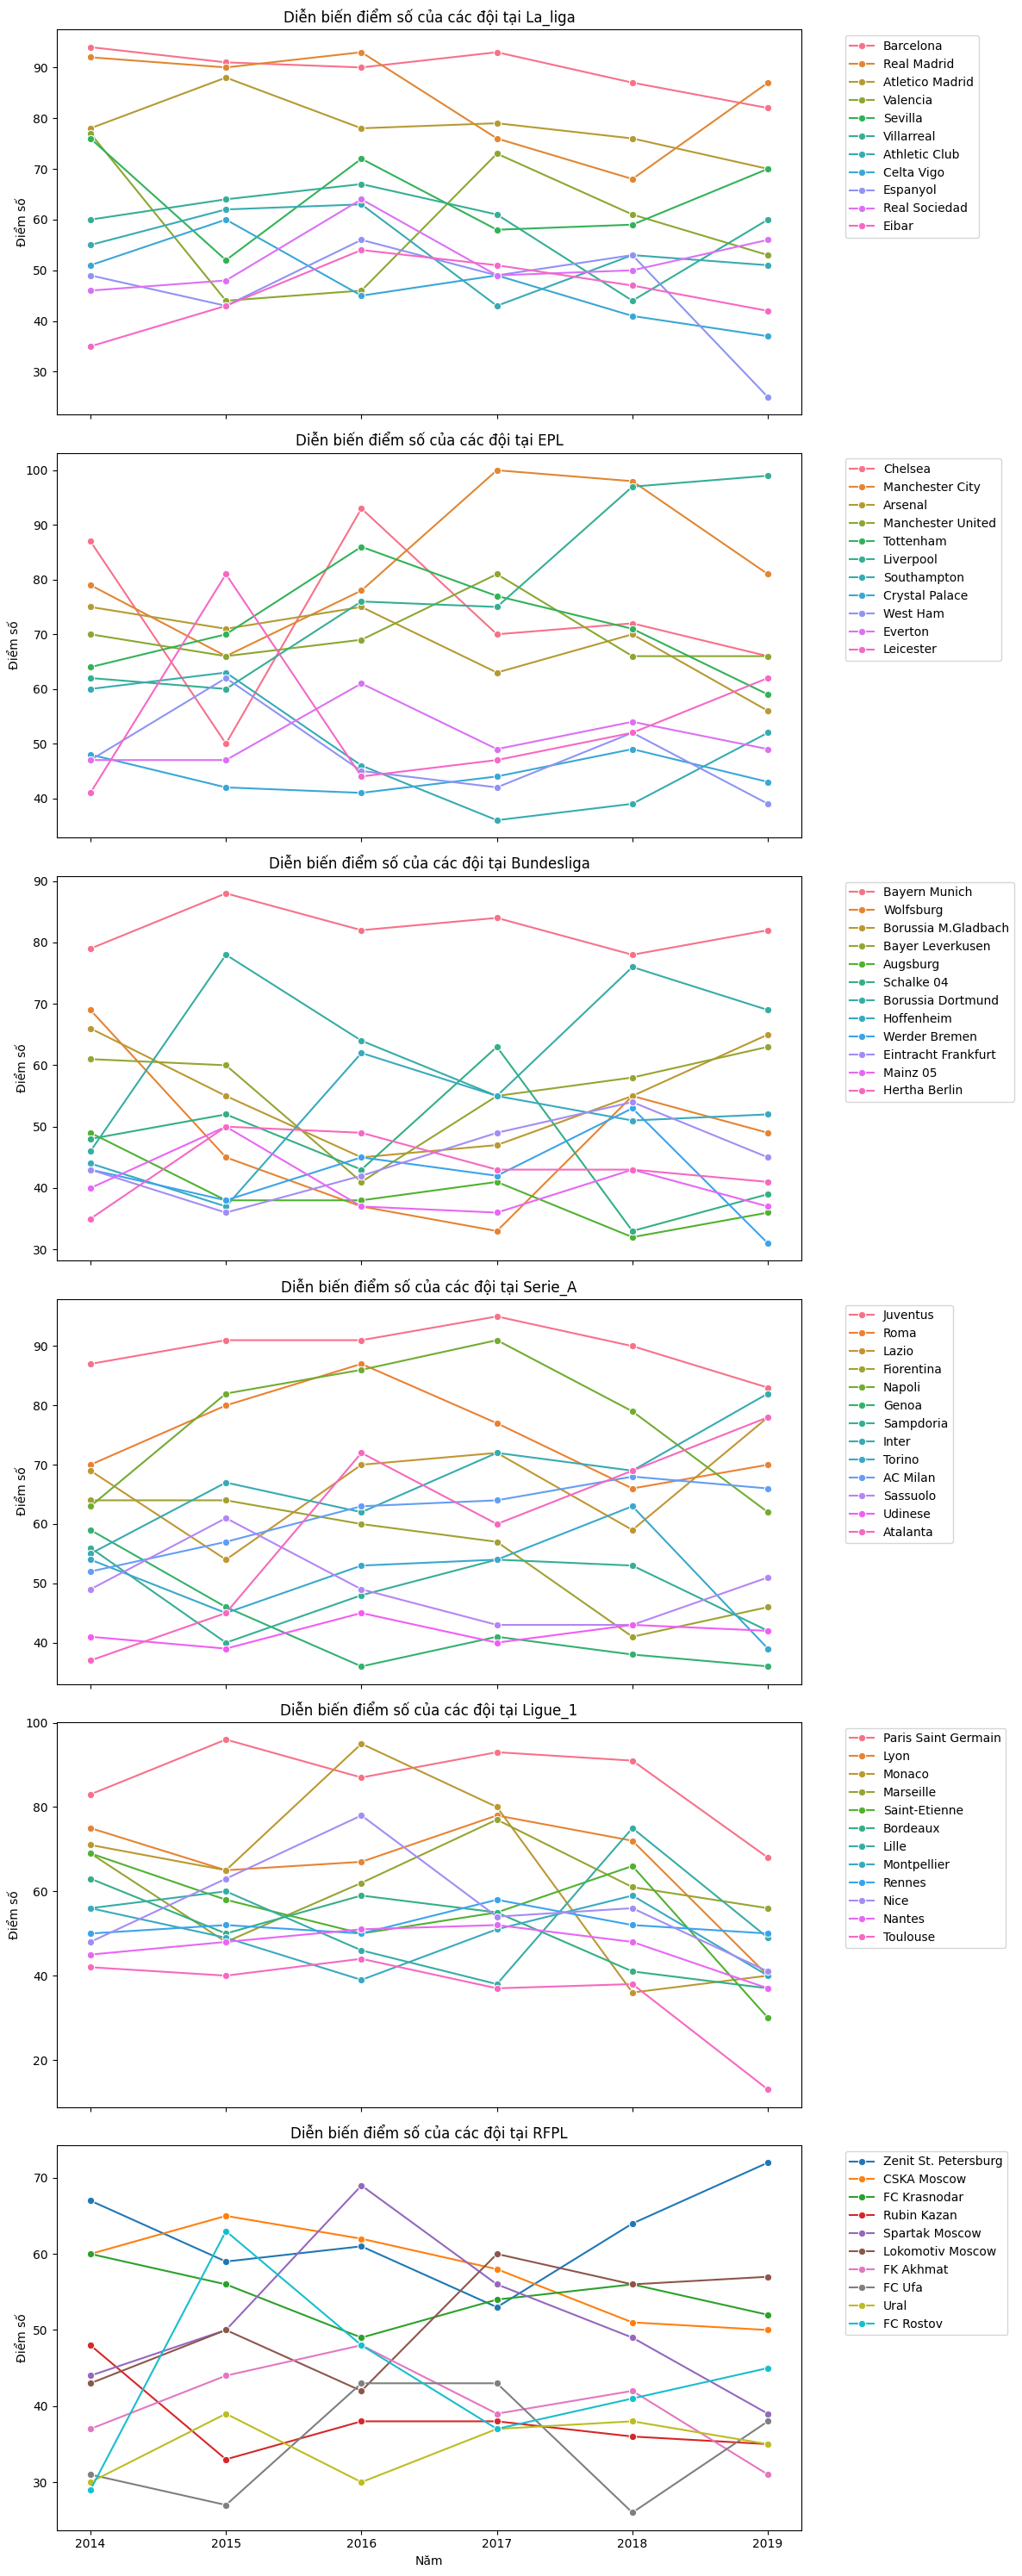

In [78]:
# Tạo biểu đồ cho từng giải đấu
fig, axes = plt.subplots(len(leagues), 1, figsize=(12, len(leagues) * 5), sharex=True)

for idx, (league, ax) in enumerate(zip(leagues, axes)):
    league_data = dfo[dfo['league'] == league]
    sns.lineplot(
        data=league_data,
        x='year',
        y='pts',
        hue='team',
        marker='o',
        ax=ax,
    )
    ax.set_title(f'Diễn biến điểm số của các đội tại {league}')
    ax.set_ylabel('Điểm số')
    ax.set_xlabel('Năm')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Dựa vào biểu đồ trên, ta thấy có một số đội có điểm số khá ổn định nhưng cũng có một số đội điểm số biến thiên rất nhiều. Vì vậy ta tiến hành tính toán xu hướng các đội có điểm số tăng hoặc giảm và điểm số biến thiên nhiều hay ít.

Ở đây, để đơn giản, đội có xu hướng tăng điểm sẽ là đội có số lần tăng điểm nhiều hơn số lần giảm điểm. Ngược lại, đội có xu hướng giảm điểm sẽ là đội có số lần giảm điểm nhiều hơn số lần tăng điểm. Cùng lúc đó, ta sẽ tính thêm điểm số lớn nhất, nhỏ nhất, trung bình và độ lệch chuẩn của từng đội trong các mùa giải.

In [79]:
# Tính xu hướng điểm số của các đội bóng
dfo['trend'] = 0

for team in dfo['team'].unique():
    team_data = dfo[dfo['team'] == team].sort_values(by='year')
    team_data['trend'] = team_data['pts'].diff().apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    dfo.loc[dfo['team'] == team, 'trend'] = team_data['trend']

teams_trend = dfo.groupby(['league', 'team']).agg({'trend': 'sum', 'pts': ['max', 'min', 'mean', 'std']}).reset_index()
teams_trend.columns = ['league', 'team', 'trend_sum', 'pts_max', 'pts_min', 'pts_mean', 'pts_std']

Sau khi đã tính toán xong, ta sẽ lọc ra các đội có xu hướng tăng điểm số tắng/giảm ở mỗi giải đấu. Kết quả sẽ được
sắp xếp theo thứ tự giảm dần của điểm số `trend_sum`, nếu có cùng điểm số thì sẽ sắp xếp theo độ lệch chuẩn điểm số nhỏ nhất `pts_std` để đánh giá độ ổn định của đội bóng.

In [80]:
teams_trend_asc = teams_trend[teams_trend['trend_sum'] > 0]

print('Số lượng đội bóng có xu hướng tăng điểm số:', teams_trend_asc.shape[0])
print('Đội có xu hướng tăng điểm số nhiều nhất ở từng giải đấu:')

teams_trend_asc = teams_trend.sort_values(by=['league', 'trend_sum', 'pts_std'], ascending=[False, False, True])
teams_trend_asc.groupby('league').head(1)

Số lượng đội bóng có xu hướng tăng điểm số: 26
Đội có xu hướng tăng điểm số nhiều nhất ở từng giải đấu:


league           team  trend_sum  pts_max  pts_min   pts_mean  \
56     Serie_A       AC Milan          3       68       52  61.666667   
54        RFPL           Ural          1       39       30  34.833333   
40     Ligue_1         Nantes          1       52       37  46.833333   
30     La_liga  Real Sociedad          3       64       46  52.166667   
16         EPL      Leicester          3       81       41  54.500000   
2   Bundesliga  Bayern Munich          1       88       78  82.166667   

      pts_std  
56   6.022181  
54   3.970726  
40   5.419102  
30   6.705719  
16  14.923136  
2    3.600926

In [81]:
teams_trend_desc = teams_trend[teams_trend['trend_sum'] < 0]

print('Số lượng đội bóng có xu hướng giảm điểm số:', teams_trend_desc.shape[0])
print('Đội có xu hướng giảm điểm số nhiều nhất ở từng giải đấu:')

teams_trend_desc = teams_trend_desc.sort_values(by=['league', 'trend_sum', 'pts_std'], ascending=[False, True, False])
teams_trend_desc.groupby('league').head(1)

Số lượng đội bóng có xu hướng giảm điểm số: 37
Đội có xu hướng giảm điểm số nhiều nhất ở từng giải đấu:


league         team  trend_sum  pts_max  pts_min   pts_mean    pts_std
59     Serie_A        Genoa         -3       59       36  42.666667   8.846845
46        RFPL  CSKA Moscow         -3       65       50  57.666667   6.022181
34     Ligue_1     Bordeaux         -3       63       37  50.833333  10.206207
25     La_liga    Barcelona         -3       94       82  89.500000   4.415880
13         EPL      Chelsea         -1       93       50  73.000000  15.388307
11  Bundesliga    Wolfsburg         -3       69       33  48.000000  13.007690

In [82]:
print('Số lượng đội bóng có độ biến thiên điểm số nhỏ:', teams_trend[teams_trend['pts_std'] < 5].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số vừa:', teams_trend[(teams_trend['pts_std'] >= 5) & (teams_trend['pts_std'] < 10)].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số lớn:', teams_trend[teams_trend['pts_std'] >= 10].shape[0])

Số lượng đội bóng có độ biến thiên điểm số nhỏ: 8
Số lượng đội bóng có độ biến thiên điểm số vừa: 37
Số lượng đội bóng có độ biến thiên điểm số lớn: 24


In [83]:
print('Thông tin tổng hợp các đội trong từng mùa giải:')
league_details = dfo.groupby('league')['pts'].agg(['max', 'min', 'mean', 'std']).reset_index()
league_details

Thông tin tổng hợp các đội trong từng mùa giải:


league  max  min       mean        std
0  Bundesliga   88   31  51.083333  14.160797
1         EPL  100   36  62.848485  16.544804
2     La_liga   94   25  61.803030  17.042228
3     Ligue_1   96   13  56.569444  16.467489
4        RFPL   72   26  46.883333  11.637304
5     Serie_A   95   36  60.576923  16.076537

**Phân tích chung:**

*   **Số lượng đội tăng/giảm:** Có 26 đội có xu hướng tăng điểm và 37 đội có xu hướng giảm điểm. Điều này cho thấy số lượng đội có xu hướng giảm điểm nhiều hơn đáng kể so với số lượng đội có xu hướng tăng điểm. Điều này có thể cho thấy tính cạnh tranh cao của các giải đấu, khi việc duy trì hoặc cải thiện thành tích là rất khó khăn.
*   **Độ biến thiên điểm số:** Nhìn chung, điểm số của các đội bóng có sự biến thiên vừa phải. Phân loại cụ thể: 8 đội biến thiên nhỏ, 37 đội biến thiên vừa và 24 đội biến thiên lớn. Điều này cho thấy sự bất ổn định trong phong độ của các đội bóng qua các mùa giải, thể hiện rõ tính cạnh tranh và khó đoán của các giải đấu. Đáng chú ý, các đội có xu hướng giảm điểm thường có độ lệch chuẩn lớn hơn so với các đội có xu hướng tăng điểm. Điều này cho thấy các đội đang gặp khó khăn thường gặp nhiều biến động hơn về điểm số, khó duy trì sự ổn định.

**Đội có xu hướng tăng điểm:**

*   **AC Milan (Serie A)** nổi bật với xu hướng tăng điểm mạnh nhất (`trend_sum = 3`), điểm số trung bình 61.67 và độ lệch chuẩn thấp (6.02), cho thấy sự ổn định trong quá trình cải thiện thành tích.
*   Một số đội khác như **Ural (RFPL), Nantes (Ligue 1) và Bayern Munich (Bundesliga)** có xu hướng tăng điểm ít hơn (`trend_sum = 1`).
*   **Real Sociedad (La Liga) và Leicester (EPL)** cũng có `trend_sum = 3`, tuy nhiên Leicester có độ lệch chuẩn cao (14.92) so với Real Sociedad (6.71), cho thấy sự ổn định kém hơn.

**Đội có xu hướng giảm điểm:**

*   **Genoa (Serie A), CSKA Moscow (RFPL), Bordeaux (Ligue 1), Barcelona (La Liga), Wolfsburg (Bundesliga)** có xu hướng giảm điểm mạnh nhất (`trend_sum = -3`).
*   **Chelsea (EPL)** có xu hướng giảm điểm ít hơn so với các đội trên (`trend_sum = -1`).

**So sánh áp lực cạnh tranh giữa các giải đấu:**

*   **EPL:** Có sự phân hóa rõ rệt. Chelsea, một đội bóng mạnh, lại có xu hướng giảm điểm, cho thấy sự cạnh tranh khốc liệt ngay cả ở nhóm đầu. Leicester có xu hướng tăng điểm nhưng độ biến thiên lớn, thể hiện sự khó khăn trong việc duy trì phong độ. Điều này cho thấy EPL là một giải đấu cạnh tranh cao. Dữ liệu tổng hợp về độ biến thiên điểm số của EPL cũng cho thấy đây là giải có độ biến thiên cao nhất.
*   **La Liga:** Barcelona có xu hướng giảm điểm mạnh, cho thấy áp lực cạnh tranh rất lớn, ngay cả với các đội hàng đầu. Real Sociedad có xu hướng tăng điểm ổn định. Độ biến thiên điểm số trung bình cho thấy La Liga cũng là một giải đấu cạnh tranh.
*   **Serie A:** AC Milan có xu hướng tăng điểm ổn định, nhưng Genoa lại giảm điểm mạnh. Điều này cho thấy Serie A cũng có sự cạnh tranh đáng kể.
*   **Bundesliga:** Bayern Munich có xu hướng tăng điểm ổn định, nhưng Wolfsburg lại giảm điểm mạnh. Điều này cho thấy Bundesliga cũng có sự phân hóa và cạnh tranh. Độ biến thiên điểm số của Bundesliga thấp nhất, cho thấy tính ổn định tương đối cao so với các giải khác.
*   **RFPL:** Ural có xu hướng tăng điểm, CSKA Moscow lại giảm điểm mạnh. Độ biến thiên điểm số ở mức trung bình.

**Tổng kết:**

Dựa trên phân tích trên, **EPL** và **La Liga** có vẻ là hai giải đấu có áp lực cạnh tranh cao nhất, thể hiện qua sự biến động điểm số lớn và việc ngay cả các đội mạnh cũng có xu hướng giảm điểm. **Serie A** và **Bundesliga** cũng cho thấy sự cạnh tranh đáng kể. **RFPL** có vẻ ít cạnh tranh hơn so với các giải còn lại nếu chỉ xét về độ biến thiên điểm số.

### Câu 11: Dựa trên điểm số đội bóng qua các mùa giải, điểm của các đội trong các giải đấu vào những năm tiếp theo là như thế nào? <a name="q11"></a>

**Lợi ích của mô hình dự đoán**

Việc xây dựng mô hình dự đoán giúp các huấn luyện viên và nhà phân tích đưa ra các quyết định chiến lược chính xác hơn trong các mùa giải tiếp theo, dựa trên dữ liệu và phân tích khoa học.

#### Chọn mô hình dự đoán

- **Gradient Boosting Regressor**: đây là một mô hình học máy mạnh mẽ, thuộc nhóm mô hình ensemble. Gradient Boosting kết hợp nhiều cây quyết định yếu (weak learners) để tạo ra một mô hình mạnh mẽ. Mỗi cây quyết định trong mô hình này được huấn luyện để khắc phục lỗi của cây trước đó. Gradient Boosting thường hoạt động rất tốt với các bài toán hồi quy phức tạp và có thể học từ dữ liệu không tuyến tính với mức độ chính xác cao.

- **StandardScaler**: chuẩn hóa dữ liệu bằng cách biến đổi các đặc trưng sao cho có giá trị trung bình là 0 và độ lệch chuẩn là 1. Điều này giúp các mô hình học máy hoạt động hiệu quả hơn, đặc biệt với các thuật toán yêu cầu dữ liệu có cùng phạm vi giá trị, giúp cải thiện độ chính xác và tốc độ huấn luyện.

- **Mean Absolute Error (MAE)**: đây là một chỉ số đánh giá độ chính xác của mô hình hồi quy, tính toán trung bình giá trị tuyệt đối của sai số giữa giá trị thực tế và giá trị dự đoán. MAE dễ hiểu và hữu ích khi cần đo lường sai lệch thực tế giữa giá trị dự đoán và giá trị thực tế mà không làm quá lớn ảnh hưởng của các sai số lớn (như trong MSE).


#### Thư viện cần thiết để huấn luyện mô hình

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

#### Chọn các đặc trưng trong mô hình dự đoán điểm số

Mục tiêu của mô hình là dự đoán điểm số thực tế (`pts`) của đội bóng trong một trận đấu, do đó, các đặc trưng được lựa chọn tập trung vào việc nắm bắt các khía cạnh cốt lõi ảnh hưởng đến kết quả trận đấu, cụ thể là hiệu suất tấn công, phòng ngự và cách tiếp cận trận đấu của đội bóng.

*   **`xpts`:** Được sử dụng vì nó trực tiếp ước tính số điểm mà một đội bóng nên đạt được dựa trên chất lượng cơ hội tạo ra và để thủng lưới. Đây là một chỉ số tổng hợp quan trọng, phản ánh cân bằng giữa tấn công và phòng ngự.

*   **`xG` và `xGA`:** Được sử dụng vì chúng là các thước đo hiệu suất tấn công và phòng ngự cơ bản. `xG` cho biết khả năng tạo cơ hội ghi bàn, trong khi `xGA` đánh giá khả năng ngăn chặn đối phương ghi bàn.

*   **`npxG` và `npxGA`:** Được sử dụng để loại bỏ yếu tố ngẫu nhiên của các quả phạt đền, giúp mô hình tập trung vào lối chơi chung của đội bóng.

*   **`deep` và `deep_allowed`**: giúp mô hình hiểu được khả năng gây áp lực của đội bóng đối với đối thủ. Một đội bóng có số lần tấn công sâu cao có thể tạo ra cơ hội ghi bàn tốt hơn và qua đó ảnh hưởng trực tiếp đến kết quả trận đấu.

*   **`ppda_coef`:** Được sử dụng để định lượng cường độ pressing của đội bóng, một yếu tố chiến thuật quan trọng ảnh hưởng đến khả năng kiểm soát trận đấu và tạo ra cơ hội.

*   **`scored` và `missed`:** Được sử dụng để phản ánh kết quả thực tế của trận đấu, cung cấp thông tin trực tiếp về hiệu suất chuyển hóa cơ hội thành bàn thắng và khả năng phòng ngự.

*   **`xG_diff` và `xGA_diff`:** Được sử dụng để so sánh hiệu suất tấn công và phòng ngự của một đội so với đối thủ của họ, giúp mô hình hiểu được sự tương quan về sức mạnh giữa hai đội.


#### Huấn luyện mô hình

In [85]:
# Sao chép dữ liệu gốc
df = dfo.copy()

# Chuyển 'league' thành dạng số
league_mapping = {league: idx for idx, league in enumerate(df['league'].unique())}
df['league'] = df['league'].map(league_mapping).astype('int64')

# Chuyển 'team' thành dạng số
team_mapping = {team: idx for idx, team in enumerate(df['team'].unique())}
df['team'] = df['team'].map(team_mapping).astype('int64')

# Tạo mapping ngược cho 'league' và 'team' để gán lại sau khi huấn luyện mô hình
reverse_league_mapping = {v: k for k, v in league_mapping.items()}
reverse_team_mapping = {v: k for k, v in team_mapping.items()}

# Tạo rolling mean cho tất cả các đặc trưng cần thiết
features = ['xpts', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed',
            'ppda_coef', 'xG_diff', 'xGA_diff', 'scored', 'missed']

for feature in features:
    df[f'{feature}_rolling_mean'] = df.groupby('team')[feature].transform(lambda x: x.rolling(window=2, min_periods=1).mean())

# Tạo tập huấn luyện với các năm < 2019
train_data = df[df['year'] < 2019]
features_rolling = [f'{feature}_rolling_mean' for feature in features]
final_features = ['league', 'team', 'year'] + features_rolling

X_train = train_data[final_features].values
y_train = train_data['pts'].values

# Tạo tập kiểm tra với năm 2019
test_data = df[df['year'] == 2019].copy()
X_test_data = test_data[final_features].values
y_test = test_data['pts'].values

# Tiền xử lý dữ liệu (chuẩn hóa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_data_scaled = scaler.transform(X_test_data)

# Huấn luyện mô hình Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Dự đoán và tính MAE
y_pred = gb_model.predict(X_test_data_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Gradient Boosting): {mae}")

MAE (Gradient Boosting): 5.489720463272837


#### Dự đoán điểm số

Ví dụ, ta sẽ dự đoán điểm số của đội **Real Madrid** trong các năm 2020, 2021, 2022 và 2023 (thông tin điểm số thực tế được lấy từ [transfermarkt](https://www.transfermarkt.com/real-madrid/startseite/verein/418)).


In [86]:
# Khởi tạo danh sách chứa kết quả cho từng năm
team_name = 'Real Madrid'
team_pts = {
    '2020' : 84,
    '2021' : 86,
    '2022' : 78,
    '2023' : 95
}

Sử dụng mô hình để dự đoán điểm số

In [87]:
def update_rolling_features(df, features, team_id, current_year):
    historical_data = df[df['year'] < current_year].copy()
    base_data = test_data[test_data['team'] == team_id].iloc[0].copy()
    base_data['year'] = current_year
    base_data['pts'] = team_pts[str(current_year)]

    if current_year > 2020:
        for prev_year in range(2020, current_year):
            hist_row = base_data.copy()
            hist_row['year'] = prev_year
            hist_row['pts'] = team_pts[str(prev_year)]

            if prev_year > 2020:
                perf_ratio = team_pts[str(prev_year-1)] / team_pts['2020']
                for feature in features:
                    base_feature = feature.replace('_rolling_mean', '')
                    hist_row[base_feature] *= perf_ratio

            historical_data = pd.concat([historical_data, pd.DataFrame([hist_row])])

    team_data = historical_data[historical_data['team'] == team_id].sort_values('year')
    result_data = base_data.copy()

    for feature in features:
        base_feature = feature.replace('_rolling_mean', '')
        if len(team_data) >= 3:
            result_data[feature] = team_data[base_feature].tail(3).mean()
        else:
            result_data[feature] = team_data[base_feature].mean()

    return pd.DataFrame([result_data])

all_predictions = []
previous_years_data = pd.DataFrame()

for year in range(2020, 2024):
    new_data = update_rolling_features(df, features_rolling, team_mapping[team_name], year)

    X_new_data = scaler.transform(new_data[final_features].values)
    new_data['predicted_pts'] = gb_model.predict(X_new_data)
    new_data['error'] = new_data['pts'] - new_data['predicted_pts']

    mae_current = mean_absolute_error([new_data['pts'].values[0]], [new_data['predicted_pts'].values[0]])

    new_data['league'] = new_data['league'].map(reverse_league_mapping)
    new_data['team'] = new_data['team'].map(reverse_team_mapping)

    all_predictions.append(new_data[['league', 'team', 'year', 'pts', 'predicted_pts', 'error']])
    previous_years_data = pd.concat([previous_years_data, new_data])

final_predictions = pd.concat(all_predictions, ignore_index=True)
final_predictions['year'] = final_predictions['year'].astype(int).astype(str)
final_predictions


league         team  year  pts  predicted_pts     error
0  La_liga  Real Madrid  2020   84      78.616132  5.383868
1  La_liga  Real Madrid  2021   86      78.041317  7.958683
2  La_liga  Real Madrid  2022   78      82.009795 -4.009795
3  La_liga  Real Madrid  2023   95      85.049585  9.950415

Theo kết quả từ mô hình, dự đoán năm 2020 và 2022 có sai số tương đối nhỏ, trong khi dự đoán cho năm 2021 và 2023 có sai số lớn hơn.
Mô hình dự đoán này tuy không chính xác quá cao vì thực tế không đủ dữ liệu để dự đoán chính xác, nhưng nó vẫn cung cấp một cái nhìn tổng quan về việc dự đoán điểm số của một đội bóng bóng đá trong tương lai.

### Câu 12: Các đội bóng có số trận thắng cao có đặc điểm gì về số bàn thắng ghi được và số bàn thua? <a name="q12"></a>



**Ý nghĩa của câu hỏi:**  
Mối quan hệ giữa số trận thắng và số bàn thắng, bàn thua giúp xác định tầm quan trọng của việc tấn công hiệu quả hoặc phòng ngự chắc chắn. Ví dụ, một đội thắng nhiều trận nhờ phòng ngự tốt có thể có số bàn thắng không quá cao.


**Lợi ích khi trả lời câu hỏi:**

Giúp các đội bóng điều chỉnh chiến thuật (tấn công hoặc phòng ngự) phù hợp với mục tiêu đạt thứ hạng cao.

In [88]:
wins_stats = df_overview.groupby("wins")[["scored", "missed"]].mean().reset_index()
wins_stats

wins     scored     missed
0      2  25.333333  71.000000
1      3  23.428571  70.428571
2      4  32.571429  68.285714
3      5  27.133333  60.733333
4      6  31.294118  60.117647
5      7  30.187500  54.093750
6      8  35.162791  53.023256
7      9  37.526316  55.614035
8     10  39.214286  53.089286
9     11  40.785714  50.557143
10    12  44.285714  51.696429
11    13  48.209302  50.534884
12    14  47.050000  46.300000
13    15  48.974359  45.461538
14    16  52.533333  41.633333
15    17  55.285714  42.500000
16    18  58.724138  40.551724
17    19  59.727273  38.818182
18    20  61.928571  34.857143
19    21  73.133333  44.600000
20    22  69.384615  33.769231
21    23  74.428571  37.214286
22    24  81.875000  37.375000
23    25  80.600000  27.600000
24    26  84.777778  32.444444
25    27  87.500000  27.500000
26    28  88.125000  29.000000
27    29  97.166667  30.166667
28    30  99.571429  26.857143
29    32  95.333333  27.666667

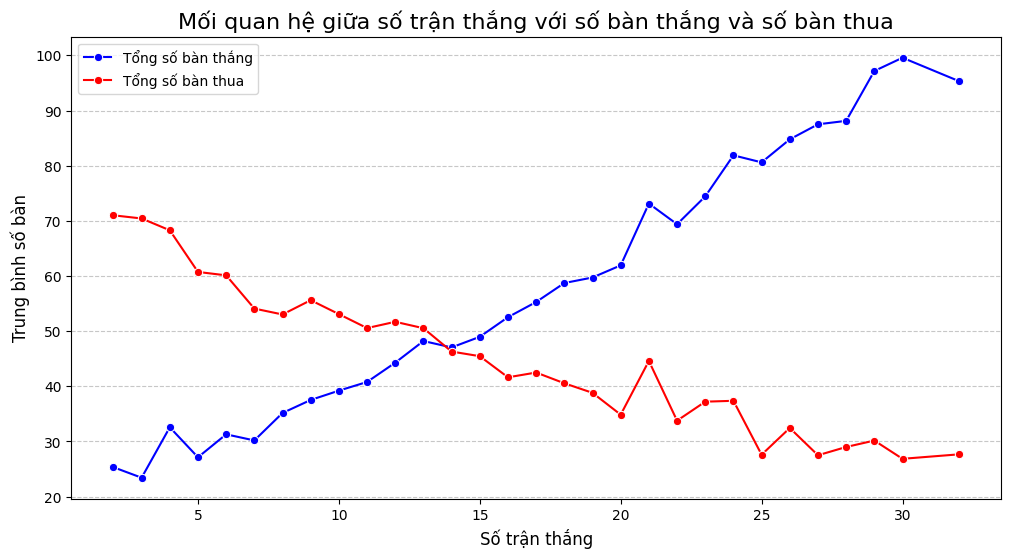

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=wins_stats, x="wins", y="scored", label="Tổng số bàn thắng", marker="o", color="blue")
sns.lineplot(data=wins_stats, x="wins", y="missed", label="Tổng số bàn thua", marker="o", color="red")
plt.title("Mối quan hệ giữa số trận thắng với số bàn thắng và số bàn thua", fontsize=16)
plt.xlabel("Số trận thắng", fontsize=12)
plt.ylabel("Trung bình số bàn", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Nhận xét**
- Các đội có số trận thắng cao hơn (từ 15 trở lên) thường ghi được nhiều bàn thắng hơn và để thủng lưới ít hơn.
- Khi số trận thắng tăng lên, số bàn thắng trung bình cũng tăng đáng kể, trong khi số bàn thua giảm dần.

- Các đội có từ 27 trận thắng trở lên thường ghi trung bình hơn 87 bàn thắng và chỉ để thủng lưới khoảng 30 bàn. Đây là sự vượt trội về cả tấn công và phòng thủ.
- Đặc biệt, đội thắng 32 trận ghi tới 95.3 bàn thắng và chỉ để thủng lưới 27.7 bàn, cho thấy sự cân bằng xuất sắc.
- Các đội có từ 15-20 trận thắng ghi trung bình 50-70 bàn thắng, nhưng vẫn để thủng lưới khoảng 45-50 bàn. Điều này cho thấy sự thiếu ổn định trong phòng ngự so với các đội top đầu.

- Các đội thắng dưới 10 trận có số bàn thắng thấp, khoảng 28-40 bàn, nhưng số bàn thua cao, dao động từ 60-70 bàn. Điều này chỉ ra rằng các đội này gặp khó khăn trong cả tấn công lẫn phòng thủ.

**=> Có một mối quan hệ chặt chẽ giữa số trận thắng và hiệu suất ghi bàn, cũng như khả năng phòng ngự.Các đội thắng nhiều trận thường ghi được số lượng bàn thắng lớn, thể hiện sức mạnh tấn công.
Giữ số bàn thua thấp, cho thấy sự chắc chắn trong phòng ngự.**

## **4. Tự đánh giá** <a name="reflection"></a>

|<center><div style="width:150px">MSSV</div>|<div style="width:250px">Khó khăn</div>|<div style="width:250px">Bài học </div>|
|---------- |:-------------:|:-------------:|
| <center>Nguyễn Phúc Khang |<left> Code chưa thực sự tối ưu.<br> Vẽ biểu đồ chưa đẹp.<br>| Học thêm nhiều phương thức giúp code tối ưu hơn <br>và trực quan hóa dữ liệu đẹp hơn<br>|
| <center>Nguyễn Trung Quân |<left> Xây dựng mô hình còn chưa chính xác <br>| Học thêm nhiều phương pháp xử lý dữ liệu để xây dựng mô hình tốt hơn <br>|
| <center>Phan Thị Tường Vi |<left> Gặp khó khăn trong việc xây dựng mô hình để trả lời câu hỏi| Biết cách trực quan hóa dữ liệu để đúc kết tri thức hiệu quả|

**Nếu có nhiều thời gian hơn, nhóm mong muốn sẽ:**
- Tổ chức nhiều buổi họp hơn để cùng thảo luận, tìm hiểu sâu hơn về lĩnh vực bóng đá và thông tin dữ liệu mà nhóm thu thập
- Đưa ra thêm các câu hỏi mang tính ý nghĩa, sâu sắc hơn nhằm khai thác nhiều hơn những thông tin mà dữ liệu mang lại.
- Học thêm nhiều dạng trực quan hóa dữ liệu.

## **5. Tham khảo** <a name="ref"></a>

- [Gradient Boosting Classifier - scikitlearn docs](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Explaining xG, PPDA, field tilt and how to use them - NY Times](https://www.nytimes.com/athletic/2730755/2021/07/28/the-athletics-football-analytics-glossary-explaining-xg-ppda-field-tilt-and-how-to-use-them/)
- [Matplotlib visualization tips that make plots speak for themselves - Alexandr Koryachko
](https://www.xomnia.com/post/matplotlib-visualization-tips-that-make-plots-speak-for-themselves/)
- [Visualization with Seaborn - Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)